#### Parâmetros do Problema

- **Massas padrão:** `m = 1 kg`  
- **Constante elástica:** `k = 1 N/m`  
- **Tamanhos da cadeia:** `N = 100`, `1000`, `10.000`  
- **Defeito:** massa central `m2 = 5 kg` (apenas em uma das simulações)  

As extremidades da cadeia estão livres.

#### 1. Cálculo das Frequências de Vibração

Para cada valor de `N`, calcule as frequências naturais de vibração do sistema em duas situações:

- **Cadeia homogênea:** todas as massas iguais a `m`.
- **Cadeia com defeito de massa:** massa central substituída por `m2 = 5m`.

Os autovalores da matriz dinâmica representam os quadrados das frequências naturais.

#### 2. Densidade de Estados

Construa histogramas das frequências naturais (√autovalores) para:

- Cadeias homogêneas e com defeito
- Diferentes tamanhos de `N`

Compare os histogramas para analisar o efeito do defeito e do tamanho da cadeia sobre a distribuição espectral.

#### 3. Deslocamentos Relativos (Modos Normais)

Para cada cadeia:

- Obtenha os autovetores associados às cinco menores e cinco maiores frequências.
- Plote os vetores de deslocamento dos átomos para esses modos.

Estes modos revelam padrões coletivos e localizados de oscilação.

#### 4. Análise e Comparação

Analise como o **tamanho da cadeia** e a **presença do defeito de massa** afetam:

- A **distribuição das frequências naturais** (densidade de estados)
- Os **modos normais de vibração**

#### Pontos de discussão:
- Como os modos de alta e baixa frequência se comportam?
- O defeito de massa introduz modos localizados?
- Há deslocamentos significativos próximos ao defeito?

##### Orientações para Implementação em Python

- Comente e documente o código de forma clara.
- Utilize as bibliotecas `numpy` e `matplotlib`.
- Calcule autovalores e autovetores da matriz dinâmica.
- Para valores grandes de `N`, implemente otimizações:
  - Use `scipy.sparse` e `eigsh` para matrizes esparsas.
- Publique o código final em um repositório no GitHub.
- Inclua o link do repositório no relatório final.

---

# Análise de Vibração em Cadeias de Átomos com Defeito de Massa

### **1. Introdução**

O modelo massa-mola é uma das idealizações mais fundamentais da física do estado sólido, servindo como base para a compreensão das vibrações da rede em cristais, conhecidas como fônons. Uma cadeia atômica unidimensional (1D), onde massas pontuais (átomos) são conectadas por molas (ligações interatômicas), captura a essência da dinâmica coletiva em materiais. O estudo das frequências naturais e dos modos normais de vibração deste sistema permite prever propriedades macroscópicas importantes, como a capacidade térmica, a condutividade térmica e a resposta a ondas eletromagnéticas.

Este estudo tem como objetivo analisar computacionalmente as propriedades vibracionais de uma cadeia 1D finita com extremidades livres. Dois cenários são apresentados: uma cadeia **homogênea**, com todos os átomos de massa idêntica, e uma cadeia **com defeito**, onde o átomo central é substituído por um de massa superior. A análise visa elucidar os efeitos do tamanho da cadeia e da presença de uma impureza na distribuição das frequências vibracionais (Densidade de Estados) e na forma dos modos normais.

In [1]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

In [2]:
diagrama = """
flowchart TD
    A[Início da Simulação] --> B[Inicialização AtomicChain1D]
    B --> C{Parâmetros do Sistema}
    C --> D[m = 1.0 kg<br/>m2 = 5.0 kg<br/>k = 1.0 N/m]
    
    D --> E[Loop: Comprimentos de Cadeia]
    E --> F[N = 100, 1000, 10000]
    
    F --> G[Configuração Homogênea]
    F --> H[Configuração com Defeito]
    
    G --> I[Construção da Matriz Dinâmica]
    H --> J[Construção da Matriz Dinâmica<br/>com Defeito Central]
    
    I --> K{Seleção do Método}
    J --> K
    K -->|N ≤ 200| L[Método Denso<br/>scipy.linalg.eigh]
    K -->|N > 200| M[Método Tridiagonal<br/>scipy.linalg.eigh_tridiagonal]
    
    L --> N[Diagonalização]
    M --> N
    
    N --> O[Autovalores → Frequências²]
    O --> P[Autovetores → Modos Normais]
    
    P --> Q[Armazenamento dos Resultados]
    Q --> R{Todas as Configurações<br/>Processadas?}
    
    R -->|Não| F
    R -->|Sim| S[Análises e Visualizações]
    
    S --> T[Análise da Densidade de Estados]
    S --> U[Análise dos Modos Normais]
    S --> V[Análise do Impacto do Defeito]
    
    T --> W[Histogramas Normalizados]
    T --> X[Estimativa KDE]
    T --> Y[Gráfico de Diferenças]
    
    U --> Z[Visualização dos 5 Primeiros Modos]
    U --> AA[Visualização dos 5 Últimos Modos]
    
    V --> BB[Deslocamentos de Frequência]
    V --> CC[Localização no Defeito]
    V --> DD[Sobreposição de Modos]
    
    W --> EE[Gráficos]
    X --> EE
    Y --> EE
    Z --> EE
    AA --> EE
    BB --> EE
    CC --> EE
    DD --> EE
    
    EE --> FF[Fim da Simulação]
    
    style A fill:#e1f5fe
    style B fill:#f3e5f5
    style D fill:#fff3e0
    style K fill:#e8f5e8
    style N fill:#ffebee
    style S fill:#f1f8e9
    style EE fill:#e0f2f1
    style FF fill:#fce4ec
    
    classDef configBox fill:#e3f2fd,stroke:#1976d2,stroke-width:2px
    classDef analysisBox fill:#f9fbe7,stroke:#689f38,stroke-width:2px
    classDef resultBox fill:#fff8e1,stroke:#f57c00,stroke-width:2px
    
    class G,H configBox
    class T,U,V analysisBox
    class W,X,Y,Z,AA,BB,CC,DD resultBox
"""

mm(diagrama)

In [3]:
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from scipy.linalg import eigh, eigh_tridiagonal
from scipy.signal import find_peaks
from sklearn.neighbors import KernelDensity
import seaborn as sns
import time
from typing import Tuple, List, Dict, Optional
import warnings

# --- Configurações Globais ---
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

# --- Parâmetros do Problema ---
m = 1.0    # Massa padrão (kg)
m2 = 5.0   # Massa do defeito (kg)
k = 1.0    # Constante elástica (N/m)
chain_lengths = [100, 1000, 10000]  # Número de átomos na cadeia

### **2. Metodologia**

O cálculo das frequências e dos modos normais de vibração de um sistema de osciladores acoplados se resume a resolver um problema de autovalores. O ponto de partida são as equações de movimento de Newton para cada átomo $i$:

$$m_i \frac{d^2u_i}{dt^2} = k(u_{i+1} - u_i) - k(u_i - u_{i-1})$$

onde $u\_i$ é o deslocamento do átomo $i$ de sua posição de equilíbrio, $m\_i$ é sua massa e $k$ é a constante de mola. Assumindo soluções oscilatórias da forma $u\_i(t) = A\_i e^{i\omega t}$, o sistema de equações diferenciais se transforma em um problema de autovalores generalizado:

$$(K - \omega^2 M)\vec{u} = 0$$

Onde $K$ é a matriz de rigidez, $M$ é a matriz de massa (diagonal) e os autovalores $\lambda = \omega^2$ fornecem os quadrados das frequências naturais.

O código implementa uma abordagem numérica, transformando o problema em um problema de autovalores padrão através da normalização por massa, com objetivo de garantir que os autovalores sejam reais reais (ω² ≥ 0) e ortonormais, bem como a estabilidade numérica
A matriz resolvida é então a **matriz dinâmica mass-normalized**, $D'$, definida como:

$$D' = M^{-1/2} K M^{-1/2}$$

cujos autovalores são diretamente $\omega^2$.

#### **Implementação da Matriz Dinâmica**

A matriz $D'$ é tridiagonal e simétrica. Com sua estrutura exemplificada abaixo ($N=5$):

$$ \begin{pmatrix}
d_0 & e_0 & 0 & 0 & 0 \\
e_0 & d_1 & e_1 & 0 & 0 \\
0 & e_1 & d_2 & e_2 & 0 \\
0 & 0 & e_2 & d_3 & e_3 \\
0 & 0 & 0 & e_3 & d_4
\end{pmatrix} $$

onde: $d_i$ = elementos diagonais, $e_i$ = elementos fora da diagonal

Seus elementos são:

  * **Elementos Diagonais (${D'}_{ii}$):**

      * Para os átomos internos ($1 < i < N$): ${D'}_{ii} = \frac{2k}{m_i}$. O fator 2 representa a interação com as molas à esquerda e à direita.
      * Para os átomos das extremidades ($i=1$ ou $i=N$): ${D'}_{ii} = \frac{k}{m_i}$. Este valor reflete a **condição de contorno**, onde cada átomo da ponta está conectado a apenas uma mola interna.

  * **Elementos Fora da Diagonal (${D'}_{i, i \pm1}$):**

      * ${D'}*{i, i \pm1} = \frac{-k}{\sqrt{m_i m*{i \pm1}}}$. Estes termos representam o acoplamento entre átomos vizinhos.

  * **Impacto do Defeito:**

      * Na **cadeia homogênea**, $m_i = m$ para todos os átomos, simplificando os elementos da matriz.
      * Na **cadeia com defeito**, a massa do átomo central ($i_c = N/2$) é trocada por $m_2$. Isso afeta especificamente três elementos da diagonal principal de $D'$ e dois da subdiagonal:
        1.  A diagonal principal em ${D'}_{i_c, i_c} = \frac{2k}{m_2}$.
        2.  Os termos fora da diagonal adjacentes ao defeito: ${D'}_{i_c, i_c \pm1} = \frac{-k}{\sqrt{m_2 m}}$.
        Por exemplo, para uma cadeia de $N=100$ átomos com defeito na posição central (átomo 50):
        - $D[50,50]$: elemento diagonal do átomo com defeito (massa $m_2 = 5 kg$)
        - $D[49,50]$ e $D[50,49]$: acoplamentos com o vizinho esquerdo
        - $D[51,50]$ e $D[50,51]$: acoplamentos com o vizinho direito

#### **Método Numérico**

No código foi implementado uma estratégia adaptativa de seleção de algoritmo para resolução do problema com base no tamanho do sistema:

```python
if solver_method == 'auto':
    method = 'tridiagonal' if N > 200 else 'dense'
```

##### **Método Denso (`scipy.linalg.eigh`)**

Para sistemas pequenos (N ≤ 200 átomos), se constrói e armazena toda a matriz dinâmica N×N. Uma implementação otimizada do algoritmo de Householder, reduz-se a matriz à forma tridiagonal seguido pelo algoritmo QL para diagonalização da matrix resultante.
É um algoritmo com complexidade da ordem de O(N³) em tempo, O(N²) em memória. Porém garente a máxima precisão numérica disponível (erro relativo ~10⁻¹⁵).

**Processo de construção:**
```python
def _construct_dense_matrix(self, N: int, masses: np.ndarray) -> np.ndarray:
    D = np.zeros((N, N))
    inv_masses = 1.0 / masses
    
    # Elementos diagonais: D_ii = k/m_i (extremidades) ou 2k/m_i (internos)
    diag_vals = np.full(N, 2.0 * self.k)
    diag_vals[0] = self.k      # Extremidade esquerda
    diag_vals[-1] = self.k     # Extremidade direita
    np.fill_diagonal(D, diag_vals * inv_masses)
    
    # Elementos fora da diagonal: D_{i,i±1} = -k/√(m_i * m_{i±1})
    off_diag_vals = -self.k / np.sqrt(masses[:-1] * masses[1:])
    np.fill_diagonal(D[1:], off_diag_vals)    # Diagonal superior
    np.fill_diagonal(D[:, 1:], off_diag_vals) # Diagonal inferior
```

##### **Método Tridiagonal (`scipy.linalg.eigh_tridiagonal`)**

Para sistemas grandes (N > 200 átomos), se busca explorar a natureza tridiagonal da matriz dinâmica. Aqui há uma implementação otimizada do algoritmo de Sturm seguido por bisseção ou QL.
É um algoritmo com complexidade da ordem de O(N²) em tempo, O(N) em memória. Ao mesmo tempo que tem precisão comparável ao método denso para matrizes tridiagonais

**Processo de construção:**
```python
# Elementos diagonais
inv_masses = 1.0 / masses
diag_vals = np.zeros(N)
diag_vals[1:] += self.k    # Contribuição da mola à direita
diag_vals[:-1] += self.k   # Contribuição da mola à esquerda
diag_vals *= inv_masses    # Normalização por massa

# Elementos fora da diagonal (apenas N-1 elementos)
off_diag_vals = -self.k / np.sqrt(masses[:-1] * masses[1:])
```

In [4]:
# =============================================================================
# Função Principal de Simulação
# =============================================================================

class AtomicChain1D:
    """
    Uma classe para simular e analisar as propriedades vibracionais de uma cadeia atômica 1D.
    """
    def __init__(self, m: float = 1.0, m2: float = 5.0, k: float = 1.0):
        """Inicializa a cadeia atômica com os parâmetros físicos fornecidos."""
        self.m = m
        self.m2 = m2
        self.k = k
        self.results = {}
        self.performance_stats = {}

        print("AtomicChain1D inicializada")
        print(f"  Razão de massas (m2/m): {m2/m:.1f}")

    def eigenvalue_solver(self, N: int, defect: bool = False,
                         solver_method: str = 'auto') -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Constrói a matriz dinâmica e resolve o problema de autovalores.

        Args:
            N (int): Número de átomos na cadeia.
            defect (bool): Se True, um defeito de massa é colocado no centro.
            solver_method (str): 'auto', 'dense', ou 'tridiagonal'.
                               'auto' seleciona o método mais eficiente.

        Returns:
            Uma tupla contendo frequências, modos normais e estatísticas de desempenho.
        """
        print(f"Resolvendo problema de autovalores: N={N}, defeito={defect}")
        start_time = time.time()

        # Inicializa o vetor de massas com a massa padrão
        masses = np.full(N, self.m)
        if defect and N > 1:
            center_idx = N // 2
            masses[center_idx] = self.m2
            print(f"  Defeito na posição {center_idx} com massa {self.m2}")

        # Seleção automática do método baseada no tamanho do sistema
        if solver_method == 'auto':
            # Para N > 200, o solver tridiagonal.
            method = 'tridiagonal' if N > 200 else 'dense'
        else:
            method = solver_method

        print(f"  Método selecionado: {method}")

        if method == 'dense':
            # Constrói a matriz dinâmica completa normalizada por massa
            D = self._construct_dense_matrix(N, masses)
            print(f"  Matriz: Densa {D.shape}")
            eigenvals, eigenvecs = eigh(D)
        elif method == 'tridiagonal':
            # Constrói as diagonais para o solver tridiagonal eficiente
            # A matriz dinâmica normalizada por massa tem a forma:
            # D_ii = (k/m_i) para i=0,N-1 ou (2k/m_i) caso contrário
            # D_{i,i±1} = -k/√(m_i * m_{i±1})
            inv_masses = 1.0 / masses
            diag_vals = np.zeros(N)
            diag_vals[1:] += self.k      # Contribuição da mola à direita
            diag_vals[:-1] += self.k     # Contribuição da mola à esquerda
            diag_vals *= inv_masses      # Normalização por massa

            # Elementos fora da diagonal da matriz normalizada por massa M = m^(-1/2) * K * m^(-1/2)
            off_diag_vals = -self.k / np.sqrt(masses[:-1] * masses[1:])
            print(f"  Matriz: Tridiagonal (N={N})")
            eigenvals, eigenvecs = eigh_tridiagonal(diag_vals, off_diag_vals)
        else:
            raise ValueError(f"Método de solver desconhecido: {solver_method}")

        # Os autovalores representam frequência ao quadrado (ω²), garantir que sejam não-negativos
        eigenvals = np.maximum(eigenvals, 0)
        frequencies = np.sqrt(eigenvals)

        # Ordenar autovalores e autovetores por frequência
        sort_idx = np.argsort(frequencies)
        frequencies = frequencies[sort_idx]
        eigenvecs = eigenvecs[:, sort_idx]

        solve_time = time.time() - start_time
        print(f"Concluído em {solve_time:.3f} segundos")
        print(f"Faixa de frequências: {frequencies.min():.4f} - {frequencies.max():.4f} rad/s")

        return frequencies, eigenvecs, {'solve_time': solve_time, 'method': method}

    def _construct_dense_matrix(self, N: int, masses: np.ndarray) -> np.ndarray:
        """
        Constrói a matriz dinâmica normalizada por massa usando uma abordagem vetorizada.

        A matriz dinâmica para uma cadeia 1D com condições de contorno fixas tem a forma:
        - Elementos diagonais: D_ii = k/m_i (para i=0,N-1) ou 2k/m_i (caso contrário)
        - Elementos fora da diagonal: D_{i,i±1} = -k/√(m_i * m_{i±1})

        Esta implementação é mais eficiente que o loop elemento por elemento original.
        """
        D = np.zeros((N, N))
        inv_masses = 1.0 / masses

        # Termos diagonais: D_ii = k/m_i (para i=0, N-1) ou 2k/m_i (caso contrário)
        diag_vals = np.full(N, 2.0 * self.k)  # Valor padrão para átomos internos
        diag_vals[0] = self.k                 # Átomo da extremidade esquerda
        diag_vals[-1] = self.k                # Átomo da extremidade direita
        np.fill_diagonal(D, diag_vals * inv_masses)

        # Termos fora da diagonal: D_{i,i+1} = -k / sqrt(m_i * m_{i+1})
        off_diag_vals = -self.k / np.sqrt(masses[:-1] * masses[1:])
        np.fill_diagonal(D[1:], off_diag_vals)    # Diagonal superior
        np.fill_diagonal(D[:, 1:], off_diag_vals) # Diagonal inferior

        return D

    def run_simulation(self, chain_lengths: List[int]) -> Dict:
        """
        Executa a simulação completa para todos os comprimentos de cadeia especificados.
        """
        results = {}
        print(f"\nINICIANDO SIMULAÇÃO")
        print(f"{'='*60}")

        for N in chain_lengths:
            print(f"\n--- Processando cadeia com N={N} átomos ---")
            results[N] = {}

            # Cadeia homogênea
            freq_homo, modes_homo, stats_homo = self.eigenvalue_solver(N, defect=False)
            results[N]['homogeneous'] = {
                'frequencies': freq_homo,
                'modes': modes_homo,
                'stats': stats_homo
            }

            # Cadeia com defeito
            freq_defect, modes_defect, stats_defect = self.eigenvalue_solver(N, defect=True)
            results[N]['defective'] = {
                'frequencies': freq_defect,
                'modes': modes_defect,
                'stats': stats_defect
            }

            self.performance_stats[N] = {
                'homogeneous': stats_homo,
                'defective': stats_defect
            }

        self.results = results
        print(f"\nSIMULAÇÃO CONCLUÍDA COM SUCESSO")
        print(f"{'='*60}")
        return results

##### **Densidade de Estados (DOS)**

A Densidade de Estados (DOS) mostra como as frequências vibracionais se distribuem ao longo de um espectro de energia (aqui, em função de $\omega^2$). Foram empregadas duas abordagens distintas, mas complementares para visualizar a DOS: histograma tradicional e a Estimativa de Densidade por Kernel (KDE).

**Método 1: Histograma**

O histograma é um método mais direto para visualizar a distribuição de dados. Nele:

  * O intervalo de frequências ao quadrado ($\omega^2$) é dividido em uma série de intervalos discretos e adjacentes, chamados de "bins".
  * O algoritmo conta quantos valores de $\omega^2$ caem dentro de cada bin.
  * A altura de cada barra no gráfico é proporcional a essa contagem (ou à densidade, nesse caso normalizado).

A principal vantagem do histograma é sua simplicidade e interpretação direta. No entanto, ele é sensível à escolha do número e da largura dos bins. Uma escolha inadequada pode ocultar características importantes da distribuição ou, ao contrário, criar ruídos e picos falsos que não refletem a física real do sistema. A natureza "em blocos" e descontínua do histograma pode dificultar a identificação precisa de picos sutis ou a comparação detalhada entre duas distribuições, como a homogênea e a com defeito.

**Método 2: Estimativa de Densidade por Kernel (KDE)**

A KDE é uma abordagem não-paramétrica que visa estimar a função de densidade de probabilidade de uma variável aleatória, gerando uma curva suave e contínua. Em vez de agrupar os dados em bins, a KDE:

  * Centra em cada ponto de dado (cada valor de $\omega^2$) uma função suave, chamada "kernel" (aqui, uma função Gaussiana).
  * Todas essas funções de kernel individuais são então somadas para produzir a estimativa final da densidade.

A "largura" de cada kernel é controlada por um parâmetro de suavização chamado largura de banda (`bandwidth`), análogo à largura do bin em um histograma. Para determinar o valor da largura de banda foi empregada a regra de Silverman 
$$\approx 1,06 \hat{\sigma} n^{-\frac{1}{5}}$$
onde, $\hat{\sigma}$ é o desvio padrão e $n$ o tamanho da amostragem.

A vantagem do KDE é que ele fornece uma representação visual contínua e mais realista da densidade de estados, facilitando a identificação de picos, vales e a forma geral da distribuição.

Outros dois gráficos também são gerados aqui:

**1. Gráfico de Diferença da DOS (Defeito - Homogênea)**

Uma visualização que isola o impacto líquido da impureza no sistema.
O gráfico é literalmente a subtração ponto a ponto das duas curvas de Densidade de Estados (DOS) obtidas via KDE:

$$\text{Diferença}(\omega^2) = \text{DOS}_{\text{com defeito}}(\omega^2) - \text{DOS}_{\text{homogênea}}(\omega^2)$$

O resultado é uma nova curva que mostra onde a cadeia com defeito ganhou ou perdeu estados vibracionais em comparação com a cadeia homogênea.

**2. Gráfico de Distribuição Cumulativa (ECDF)**

Este gráfico oferece uma visão global e integrada da distribuição das frequências, em vez da densidade local.
Cada ponto $(x, y)$ na curva significa que $y \times 100\%$ dos modos têm $\omega^2 \leq x$.

Enquanto a DOS e sua diferença são ótimas para encontrar características locais (como picos de modos localizados), a ECDF é excelente para entender o comportamento global ou médio da distribuição. Ela resume toda a distribuição de frequências em uma única curva monotônica. E permite concluir se o efeito geral do defeito foi "amolecer" (desviar para a esquerda/cima no gráfico ECDF) ou "endurecer" (desviar para a direita/baixo) a resposta vibracional da cadeia como um todo.

In [5]:
# =============================================================================
# Funções de Análise e Visualização - DOS
# =============================================================================

def compute_kde_dos(freq_sq_homo, freq_sq_defect, N, n_points=1000):
    """
    Calcula a Estimativa de Densidade por Kernel (KDE) para a Densidade de Estados (DOS)
    em função da frequência ao quadrado (ω²).
    """
    freq_sq_min = min(freq_sq_homo.min(), freq_sq_defect.min())
    freq_sq_max = max(freq_sq_homo.max(), freq_sq_defect.max())
    freq_sq_range = np.linspace(freq_sq_min, freq_sq_max, n_points)

    # Calcula a largura de banda usando a regra de Silverman: 1.06 * σ * n^(-1/5)
    sigma_homo = np.std(freq_sq_homo)
    n_homo = len(freq_sq_homo)
    bw_homo = 1.06 * sigma_homo * (n_homo ** -0.2)

    sigma_defect = np.std(freq_sq_defect)
    n_defect = len(freq_sq_defect)
    bw_defect = 1.06 * sigma_defect * (n_defect ** -0.2)

    print(f"  Larguras de banda KDE (N={N}): Homo={bw_homo:.4f}, Defeito={bw_defect:.4f}")

    kde_homo = KernelDensity(kernel='gaussian', bandwidth=bw_homo)
    kde_defect = KernelDensity(kernel='gaussian', bandwidth=bw_defect)

    kde_homo.fit(freq_sq_homo.reshape(-1, 1))
    kde_defect.fit(freq_sq_defect.reshape(-1, 1))

    density_homo = np.exp(kde_homo.score_samples(freq_sq_range.reshape(-1, 1)))
    density_defect = np.exp(kde_defect.score_samples(freq_sq_range.reshape(-1, 1)))

    return freq_sq_range, density_homo, density_defect

def density_of_states_analysis(results: Dict, chain_lengths: List[int]):
    """
    Gera um painel abrangente para análise da DOS em função da frequência ao quadrado (ω²).
    """
    print(f"\nANÁLISE DA DENSIDADE DE ESTADOS (DOS)")
    print(f"{'='*50}")

    for N in chain_lengths:
        if N not in results:
            continue

        print(f"\nAnalisando N = {N}")
        freq_homo = results[N]['homogeneous']['frequencies']
        freq_defect = results[N]['defective']['frequencies']

        # Usa frequência ao quadrado para todos os gráficos
        freq_sq_homo = freq_homo**2
        freq_sq_defect = freq_defect**2

        fig, axes = plt.subplots(3, 2, figsize=(15, 14))

        combined_freqs_sq = np.concatenate((freq_sq_homo, freq_sq_defect))
        bins = np.histogram_bin_edges(combined_freqs_sq, bins='auto')
        xlabel_text = 'Frequência² (rad²/s²)'

        # --- Gráfico 1: Histogramas Sobrepostos ---
        ax1 = axes[0, 0]
        ax1.hist(freq_sq_homo, bins=bins, alpha=0.6, color='steelblue', label='Homogênea', density=True)
        ax1.hist(freq_sq_defect, bins=bins, alpha=0.6, color='crimson', label='Com Defeito', density=True)
        ax1.set_xlabel(xlabel_text)
        ax1.set_ylabel('Densidade')
        ax1.set_title(f'Histograma Normalizado (N={N})')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # --- Gráfico 2: KDEs Sobrepostas ---
        ax2 = axes[0, 1]
        freq_sq_range, density_homo, density_defect = compute_kde_dos(freq_sq_homo, freq_sq_defect, N)
        ax2.plot(freq_sq_range, density_homo, linewidth=2.5, color='steelblue', label='Homogênea', alpha=0.8)
        ax2.plot(freq_sq_range, density_defect, linewidth=2.5, color='crimson', label='Com Defeito', alpha=0.8)
        ax2.set_xlabel(xlabel_text)
        ax2.set_ylabel('Densidade de Estados (KDE)')
        ax2.set_title('Estimativa de Densidade por Kernel')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # --- Gráfico 3: Diferença da DOS (a partir da KDE) ---
        ax3 = axes[1, 0]
        difference = density_defect - density_homo
        ax3.fill_between(freq_sq_range, difference, alpha=0.7, color=np.where(difference >= 0, 'red', 'blue'))
        ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        ax3.set_xlabel(xlabel_text)
        ax3.set_ylabel('Diferença da DOS (Defeito - Homo)')
        ax3.set_title('Mudanças Induzidas pelo Defeito (KDE)')
        ax3.grid(True, alpha=0.3)

        # --- Gráfico 4: Distribuição Cumulativa ---
        ax4 = axes[1, 1]
        ax4.plot(np.sort(freq_sq_homo), np.linspace(0, 1, len(freq_sq_homo)), linewidth=2.5, color='steelblue', label='Homogênea')
        ax4.plot(np.sort(freq_sq_defect), np.linspace(0, 1, len(freq_sq_defect)), linewidth=2.5, color='crimson', label='Com Defeito')
        ax4.set_xlabel(xlabel_text)
        ax4.set_ylabel('Probabilidade Cumulativa')
        ax4.set_title('Distribuição Cumulativa (ECDF)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        # --- Gráfico 5: Histograma Homogêneo ---
        ax5 = axes[2, 0]
        ax5.hist(freq_sq_homo, bins=bins, color='steelblue', alpha=0.8, density=True)
        ax5.set_title('DOS - Homogênea')
        ax5.set_xlabel(xlabel_text)
        ax5.set_ylabel('Densidade')
        ax5.grid(True, alpha=0.3)

        # --- Gráfico 6: Histograma com Defeito ---
        ax6 = axes[2, 1]
        ax6.hist(freq_sq_defect, bins=bins, color='crimson', alpha=0.8, density=True)
        ax6.set_title('DOS - Com Defeito')
        ax6.set_xlabel(xlabel_text)
        ax6.set_ylabel('Densidade')
        ax6.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.suptitle(f'Análise da Densidade de Estados (N={N})', y=1.02, fontsize=16, fontweight='bold')
        plt.show()

##### **Modos Normais de Vibração**

Um modo normal de vibração é um padrão fundamental de movimento coletivo no qual todos os átomos da cadeia oscilam com a mesma frequência e com uma relação de fase fixa entre si. Qualquer vibração complexa e aparentemente caótica da cadeia pode ser matematicamente descrita como uma superposição (uma soma ponderada) desses modos normais fundamentais. Matematicamente, cada modo normal é caracterizado por:
- **Frequência angular**: $\omega_n$, autovalor da matriz dinâmica;
- **Padrão espacial**: $\psi_n (i)$, autovetor correspondente;
- **Amplitude relativa**: $A_n$, determinada pelas condições iniciais

Para um modo normal puro, o deslocamento de cada átomo $i$ no tempo $t$ é:

$$
x_i (t) = A_n \times \psi_n (t) \times \cos(\omega_n \times t + \phi_n)
$$

onde:
- $A_n$: amplitude do modo $n$;
- $\psi_n (i)$: componente do autovetor no átomo $i$;
- $\phi_n$: fase inicial do modo

In [6]:
# =============================================================================
# Funções de Análise e Visualização - Modos Normais
# =============================================================================

def mode_visualization(positions, mode_shapes, frequencies, N, config_title, defect_pos=None, n_modes=5):
    """
    Visualiza os modos normais de frequência mais baixa e mais alta.
    """
    fig, axes = plt.subplots(2, n_modes, figsize=(20, 8), constrained_layout=True)
    colors = plt.cm.viridis(np.linspace(0, 1, n_modes))

    # Modos de frequência mais baixa
    for i in range(min(n_modes, len(frequencies))):
        ax = axes[0, i]
        mode = mode_shapes[:, i]
        freq = frequencies[i]

        # Correção para modo de frequência zero (remove ruído numérico)
        if np.isclose(freq, 0, atol=1e-5):
            mode = np.full_like(mode, np.mean(mode))
            title_freq = 0.0
        else:
            title_freq = freq

        ax.plot(positions, mode, 'o-', color=colors[i], markersize=4)
        if defect_pos is not None:
            ax.axvline(x=defect_pos, color='red', linestyle='--', alpha=0.8, label='Defeito')
        ax.set_title(f'Modo #{i+1}\nω = {title_freq:.4f}')
        if i == 0: ax.set_ylabel('Deslocamento Freq. Baixa')

    # Modos de frequência mais alta
    for i in range(min(n_modes, len(frequencies))):
        ax = axes[1, i]
        mode_idx = len(frequencies) - n_modes + i
        if mode_idx >= 0:
            mode = mode_shapes[:, mode_idx]
            ax.plot(positions, mode, 'o-', color=colors[i], markersize=4)
            if defect_pos is not None:
                ax.axvline(x=defect_pos, color='red', linestyle='--')
            ax.set_title(f'Modo #{mode_idx+1}\nω = {frequencies[mode_idx]:.4f}')
            ax.set_xlabel('Posição do Átomo')
            if i == 0: ax.set_ylabel('Deslocamento Freq. Alta')

    plt.suptitle(f'Modos Normais - {config_title} (N={N})', fontsize=16, fontweight='bold')
    plt.show()


def normal_mode_analysis(results: Dict, chain_lengths: List[int]):
    """
    Analisa e visualiza os modos normais para cada configuração.
    """
    print(f"\nANÁLISE DOS MODOS NORMAIS")
    print(f"{'='*40}")

    for N in chain_lengths:
        print(f"\nVisualizando modos para N = {N}")
        positions = np.arange(N)
        defect_pos = N // 2

        for config_name in ['homogeneous', 'defective']:
            frequencies = results[N][config_name]['frequencies']
            modes = results[N][config_name]['modes']
            config_title = 'Homogênea' if config_name == 'homogeneous' else 'Com Defeito'
            mode_visualization(positions, modes, frequencies, N,
                             config_title, defect_pos if config_name == 'defective' else None)

##### **Análise de Impacto do Defeito**

A função `defect_analysis` e o painel que ela gera (`create_defect_dashboard`) visam quantificar a perturbação que o defeito introduz de três maneiras diferentes e complementares, respondendo quantitativamente às perguntas:

**1.  O quão mais "lenta" ou "rápida" cada vibração se tornou? (Deslocamento de Frequência)**

Um gráfico de barras mostra a diferença entre o quadrado da frequência de um modo na cadeia com defeito e o quadrado da frequência do modo correspondente (de mesmo índice) na cadeia homogênea.
$$\Delta\omega^2_i = (\omega^2_i)_{\text{com defeito}} - (\omega^2_i)_{\text{homogênea}}$$
Como a energia de um oscilador é proporcional a $\omega^2$, este gráfico mostra diretamente a mudança na energia de cada modo.

**2.  O quão deformado ficou o padrão de vibração de cada modo? (Similaridade de Modos)**

Este gráfico mede a similaridade na forma entre o autovetor (modo) da cadeia homogênea e o autovetor correspondente na cadeia com defeito. Ou seja, quantifica a deformação espacial dos modos. Matematicamente, é o valor absoluto do produto escalar entre os dois vetores normalizados:
$$|\langle\psi_{\text{homo}}|\psi_{\text{def}}\rangle|$$

**3.  Quais modos interagem mais fortemente com o defeito? (Amplitude no Local do Defeito)**

O gráfico apresenta a amplitude absoluta de vibração do próprio átomo de defeito em cada um dos modos do sistema. O eixo Y está em escala logarítmica para capturar uma grande faixa de valores.

In [7]:
# =============================================================================
# Funções de Análise e Visualização - Efeito do Defeito
# =============================================================================

def create_defect_dashboard(freq_homo, freq_defect, modes_homo, modes_defect, N, defect_pos):
    """
    Cria um painel para analisar o impacto do defeito de massa em função de ω².
    """
    n_compare = min(len(freq_homo), len(freq_defect))
    modes_homo_c = modes_homo[:, :n_compare].copy()
    modes_defect_c = modes_defect[:, :n_compare].copy()

    # Normaliza a fase dos modos para comparação consistente
    for i in range(n_compare):
        sign_homo = np.sign(modes_homo_c[0, i])
        sign_defect = np.sign(modes_defect_c[0, i])
        if sign_homo != 0: modes_homo_c[:, i] *= sign_homo
        if sign_defect != 0: modes_defect_c[:, i] *= sign_defect

    # Calcula a sobreposição entre modos correspondentes
    mode_overlaps = np.abs(np.sum(modes_homo_c * modes_defect_c, axis=0))
    print(f"  Análise de sobreposição de modos (N={N}): Sobreposição média = {np.mean(mode_overlaps):.4f}")

    # Calcula deslocamentos na frequência ao quadrado
    freq_sq_shifts = freq_defect[:n_compare]**2 - freq_homo[:n_compare]**2

    fig = plt.figure(figsize=(15, 8), constrained_layout=True)
    gs = GridSpec(2, 2, figure=fig)
    fig.suptitle(f'Análise do Impacto do Defeito (N={N}, Posição={defect_pos})', fontsize=16, fontweight='bold')

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.bar(range(n_compare), freq_sq_shifts, color='indigo', alpha=0.7)
    ax1.set_title('Deslocamentos de Frequência²')
    ax1.set_xlabel('Índice do Modo')
    ax1.set_ylabel('Δ Frequência² (rad²/s²)')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(mode_overlaps, 'o-', color='purple', ms=4)
    ax2.set_title('Similaridade de Modos (Sobreposição)')
    ax2.set_xlabel('Índice do Modo')
    ax2.set_ylabel(r'$|\langle\psi_{homo}|\psi_{def}\rangle|$')
    ax2.set_ylim(0, 1.05)

    ax3 = fig.add_subplot(gs[1, :])
    defect_amp_defect = np.abs(modes_defect[defect_pos, :n_compare])
    ax3.plot(freq_homo[:n_compare]**2, defect_amp_defect, 's-', c='tomato', ms=4, label='Com Defeito')
    ax3.set_title(f'Amplitude do Modo no Local do Defeito')
    ax3.set_xlabel('Frequência² (rad²/s²)')
    ax3.set_ylabel('|Amplitude|')
    ax3.set_yscale('log')
    ax3.legend()

    plt.show()

def defect_analysis(results: Dict, chain_lengths: List[int]):
    """
    Função de nível superior para realizar análise de defeitos.
    """
    print(f"\nANÁLISE DE DEFEITOS")
    print(f"{'='*40}")

    for N in chain_lengths:
        print(f"\nAnalisando defeito para N = {N}")
        freq_homo = results[N]['homogeneous']['frequencies']
        freq_defect = results[N]['defective']['frequencies']
        modes_homo = results[N]['homogeneous']['modes']
        modes_defect = results[N]['defective']['modes']
        defect_pos = N // 2
        create_defect_dashboard(freq_homo, freq_defect, modes_homo, modes_defect, N, defect_pos)

### **3. Resultados**

INICIALIZANDO SIMULAÇÃO DE CADEIA ATÔMICA
AtomicChain1D inicializada
  Razão de massas (m2/m): 5.0

INICIANDO SIMULAÇÃO

--- Processando cadeia com N=100 átomos ---
Resolvendo problema de autovalores: N=100, defeito=False
  Método selecionado: dense
  Matriz: Densa (100, 100)
Concluído em 0.015 segundos
Faixa de frequências: 0.0000 - 1.9998 rad/s
Resolvendo problema de autovalores: N=100, defeito=True
  Defeito na posição 50 com massa 5.0
  Método selecionado: dense
  Matriz: Densa (100, 100)
Concluído em 0.002 segundos
Faixa de frequências: 0.0000 - 1.9990 rad/s

--- Processando cadeia com N=1000 átomos ---
Resolvendo problema de autovalores: N=1000, defeito=False
  Método selecionado: tridiagonal
  Matriz: Tridiagonal (N=1000)
Concluído em 0.137 segundos
Faixa de frequências: 0.0000 - 2.0000 rad/s
Resolvendo problema de autovalores: N=1000, defeito=True
  Defeito na posição 500 com massa 5.0
  Método selecionado: tridiagonal
  Matriz: Tridiagonal (N=1000)
Concluído em 0.119 segundos


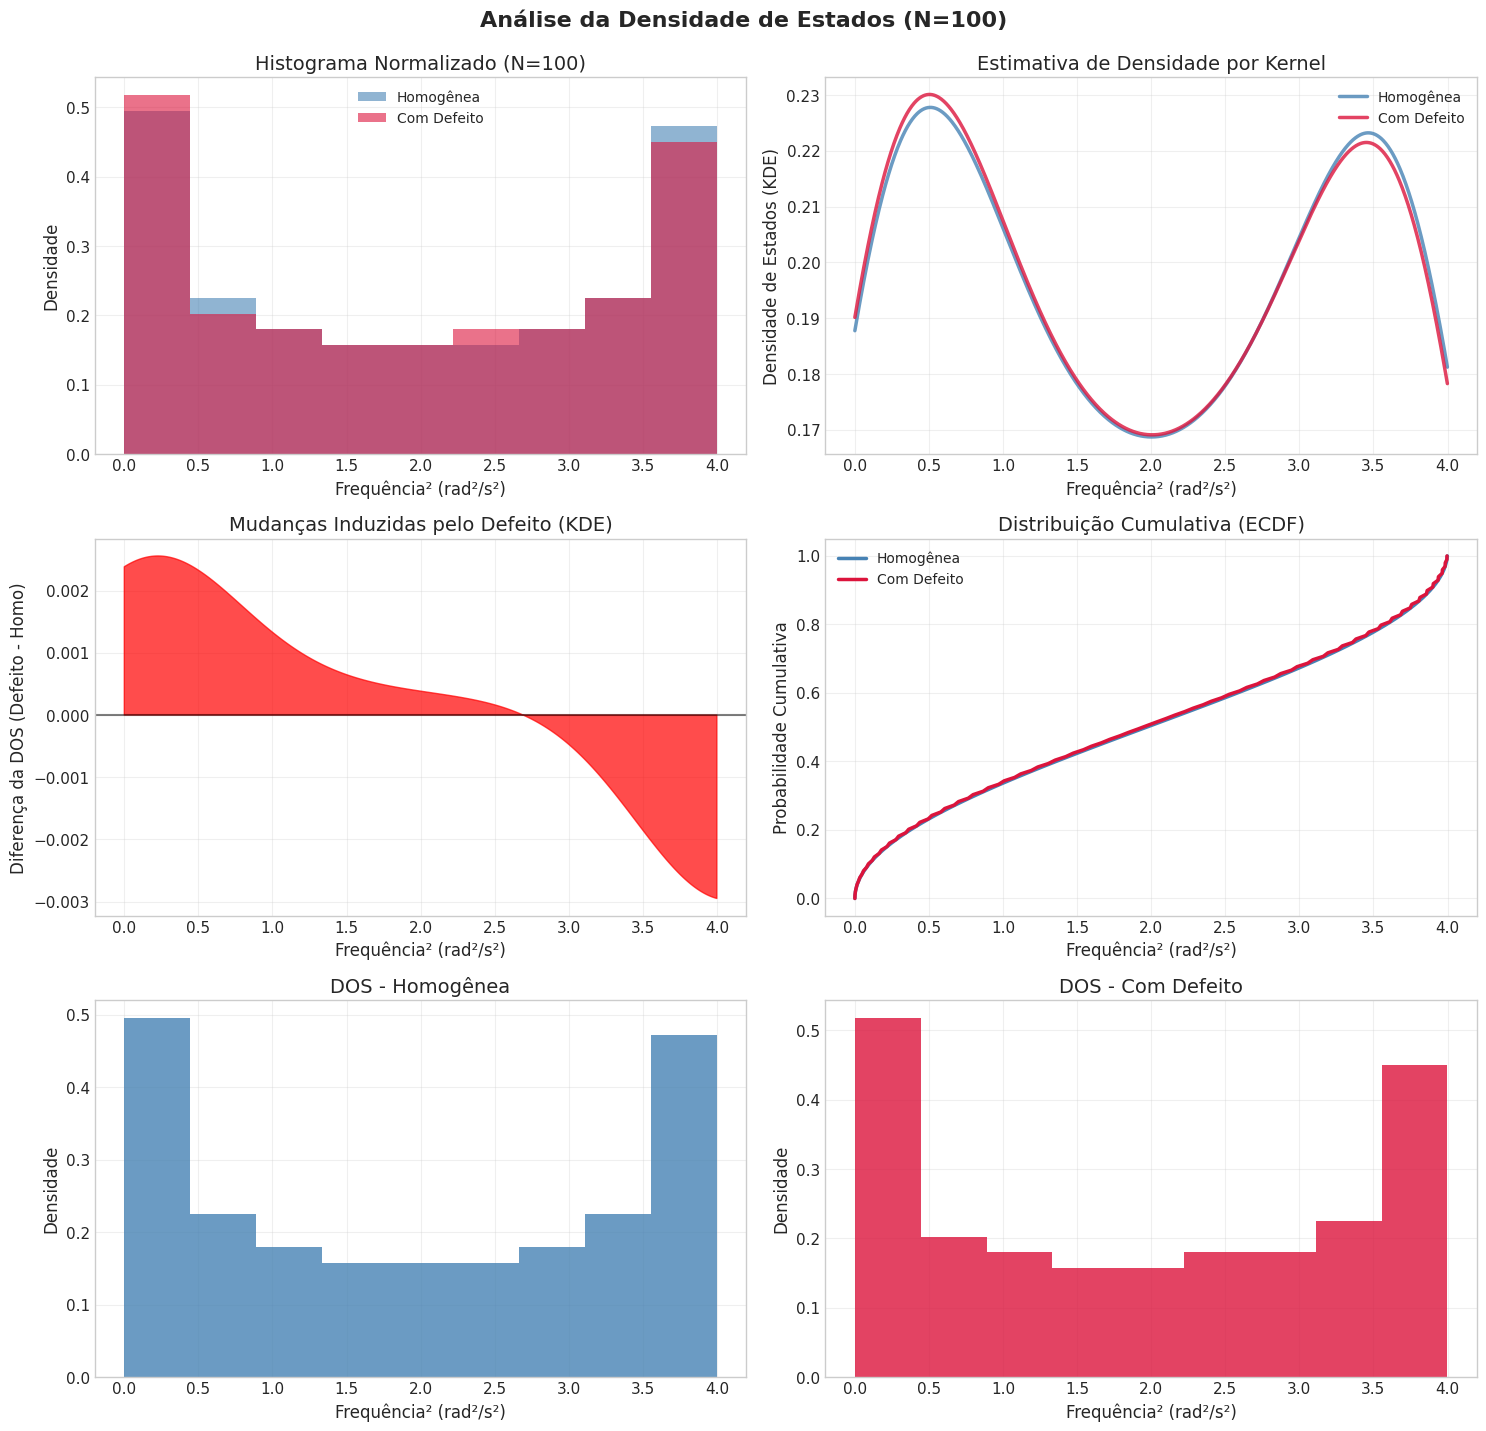


Analisando N = 1000
  Larguras de banda KDE (N=1000): Homo=0.3765, Defeito=0.3765


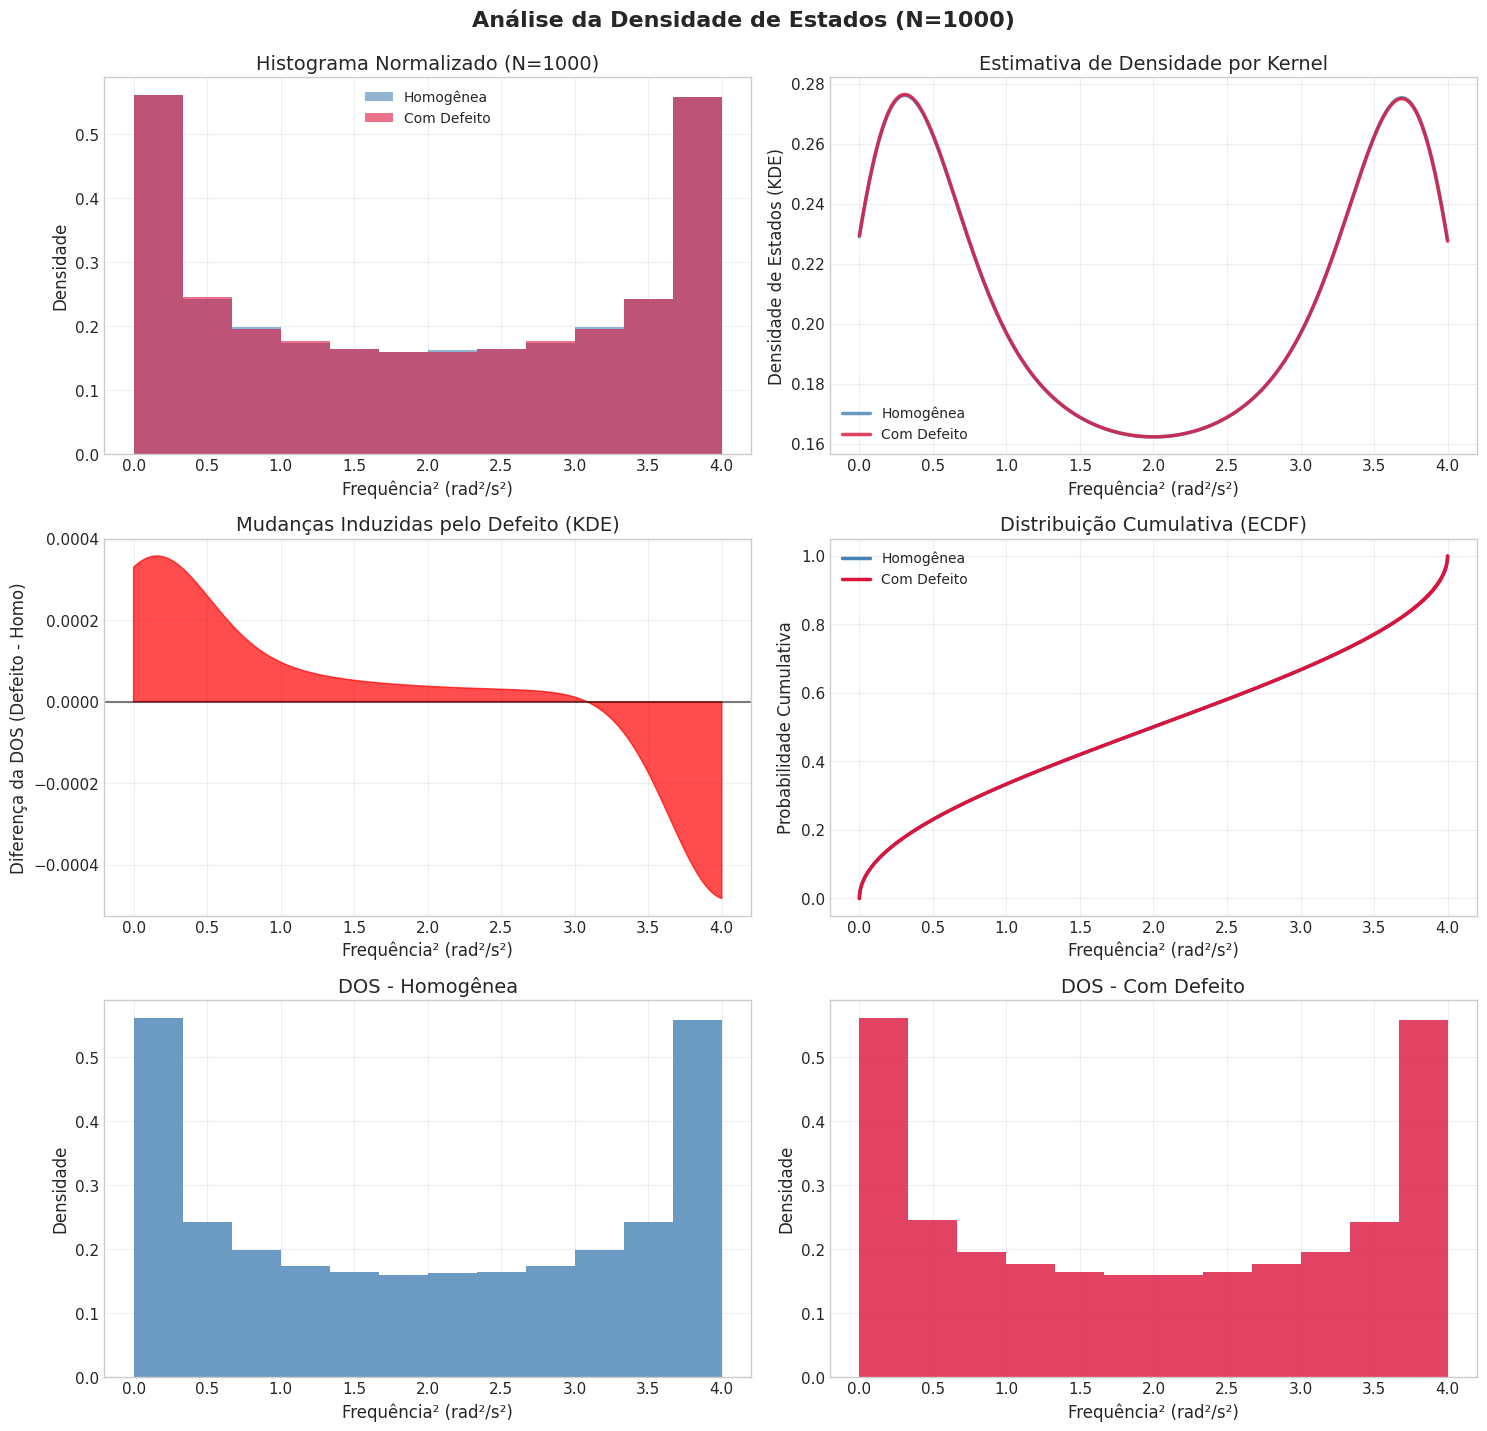


Analisando N = 10000
  Larguras de banda KDE (N=10000): Homo=0.2376, Defeito=0.2376


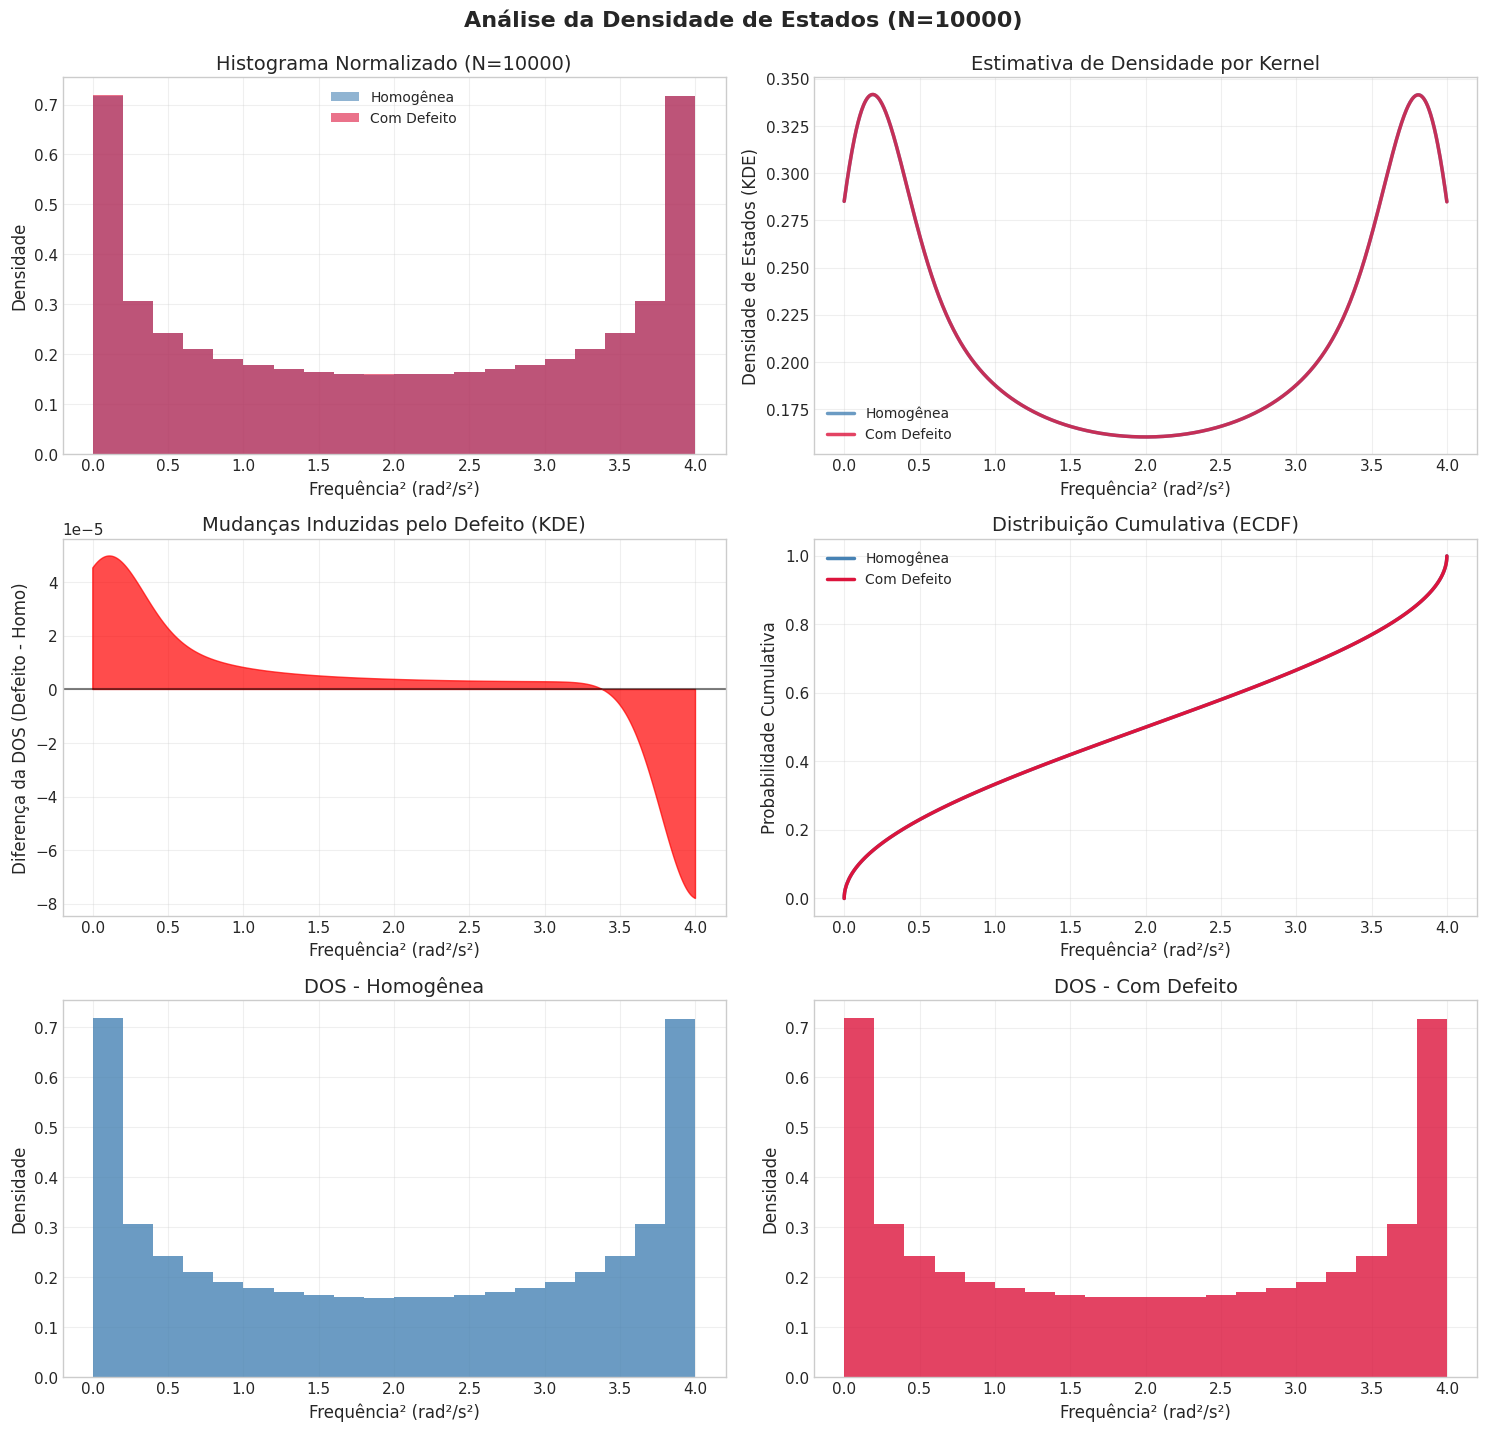


ANÁLISE DOS MODOS NORMAIS

Visualizando modos para N = 100


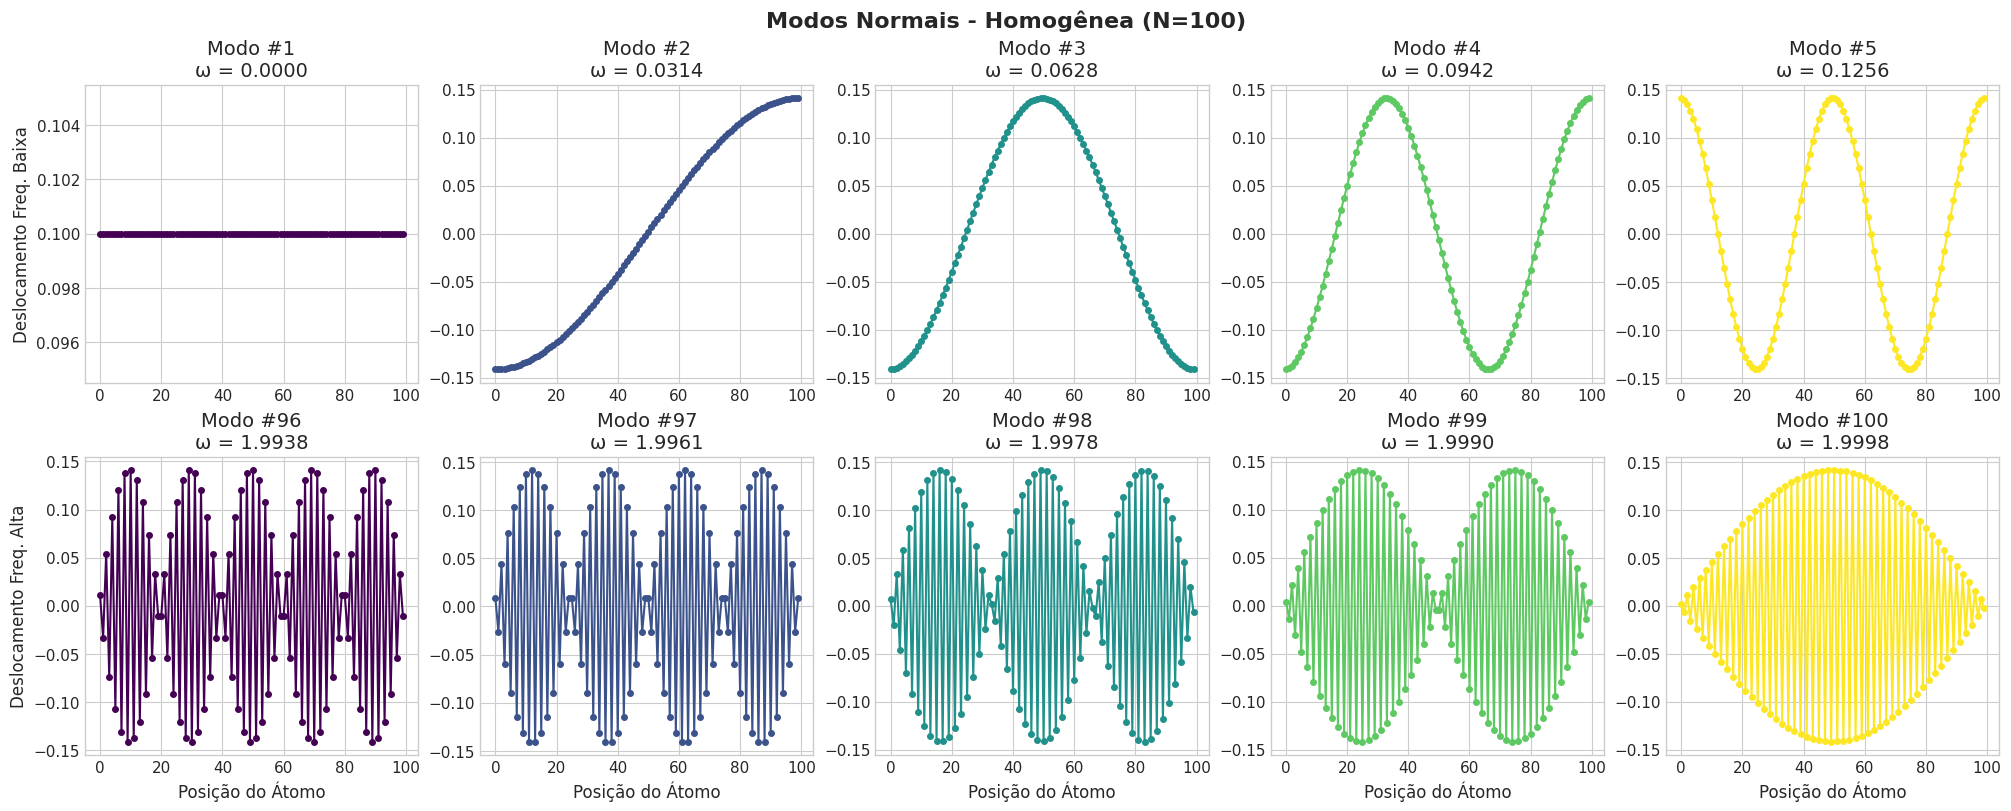

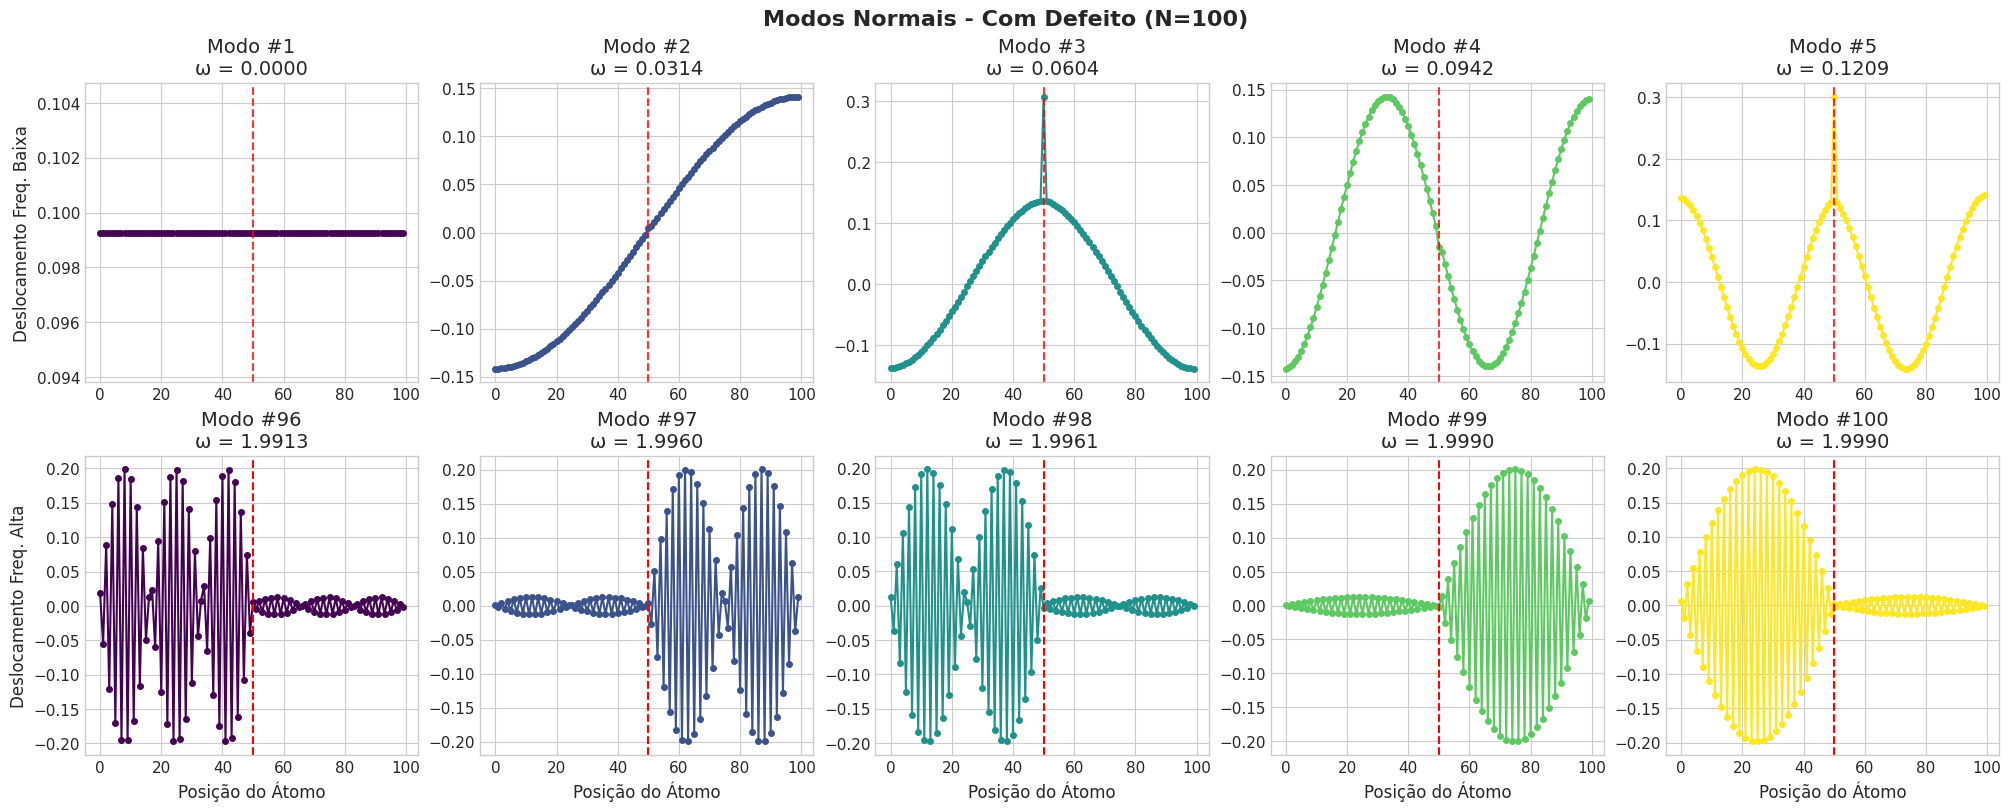


Visualizando modos para N = 1000


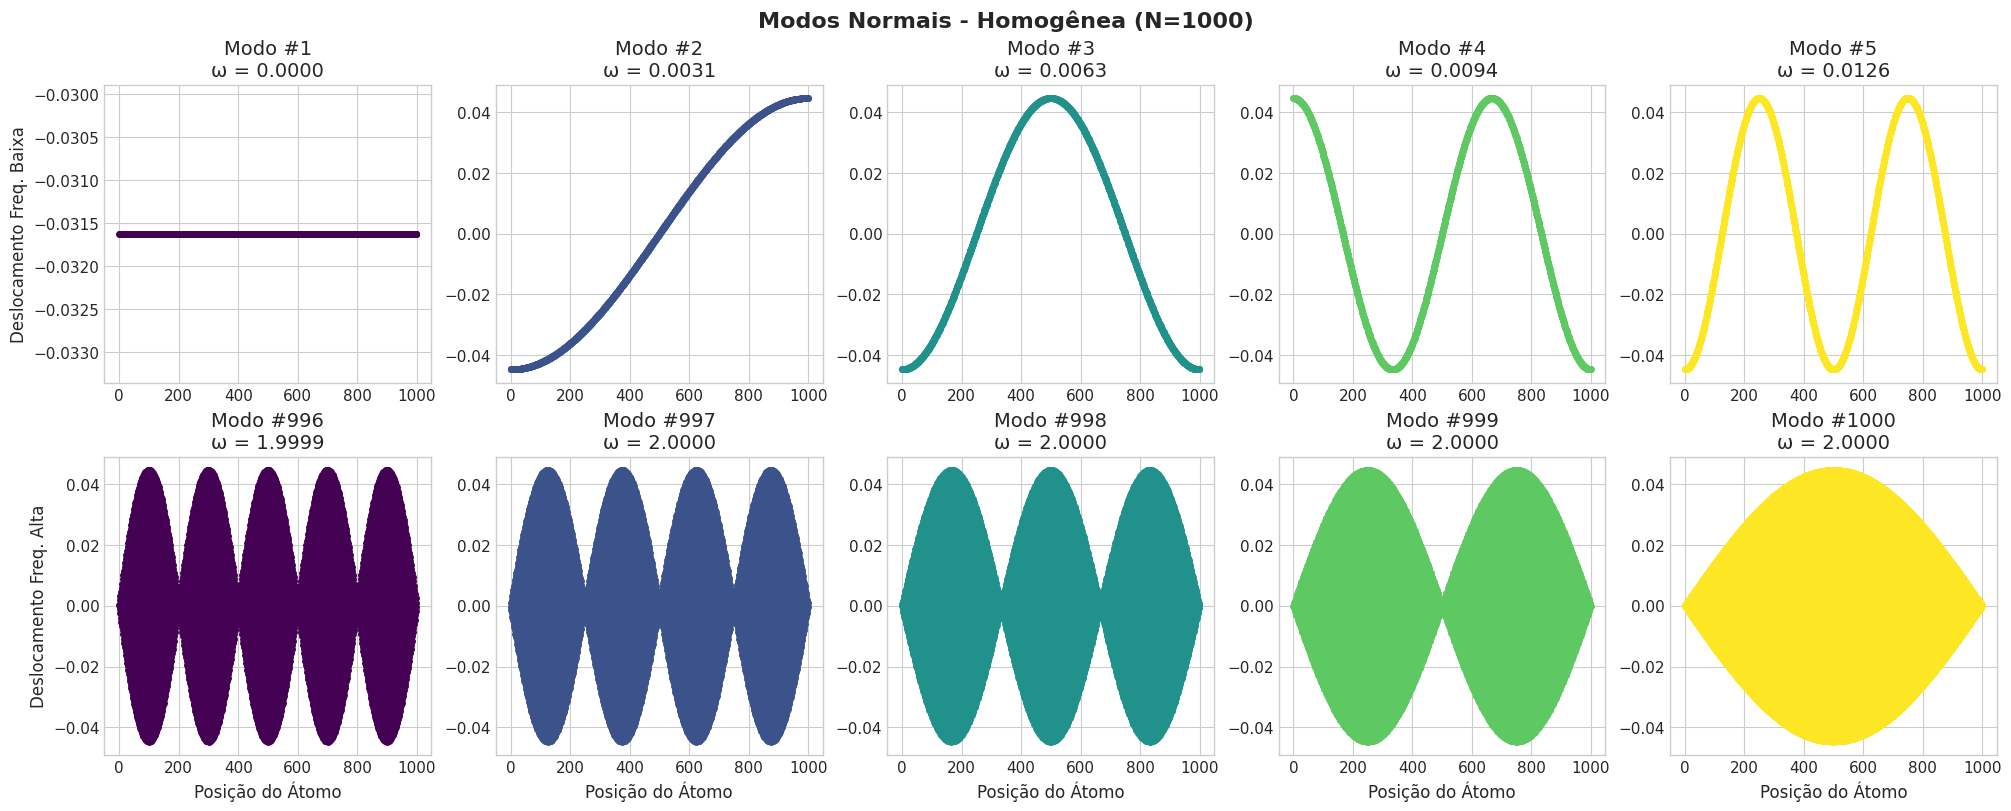

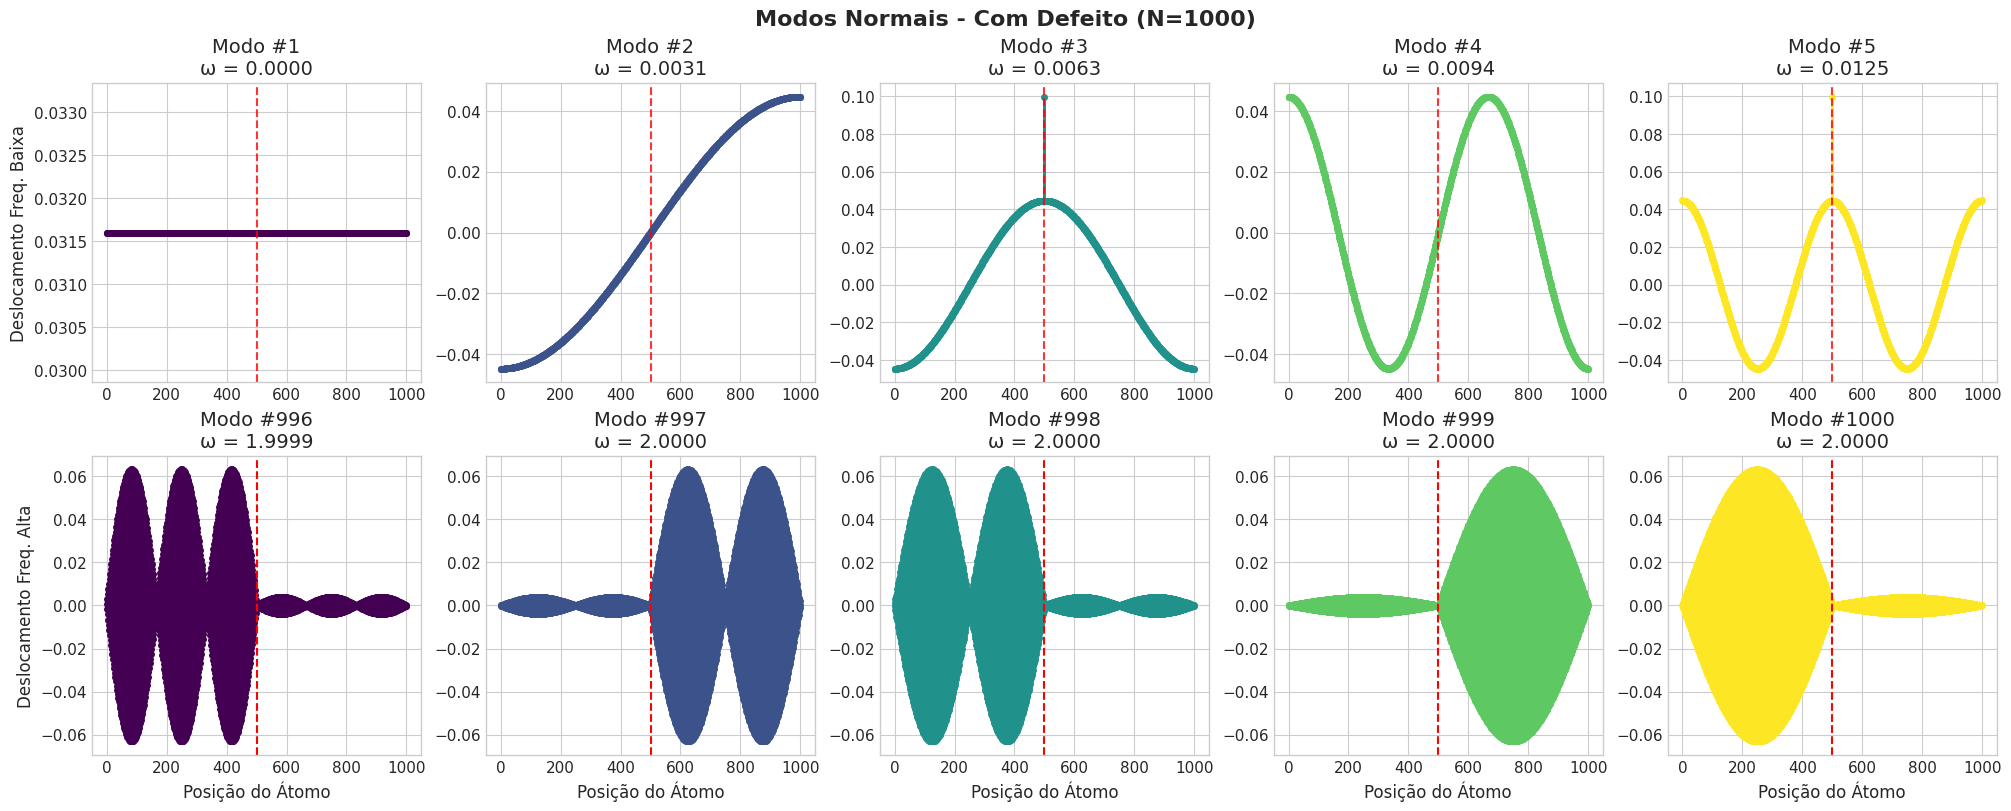


Visualizando modos para N = 10000


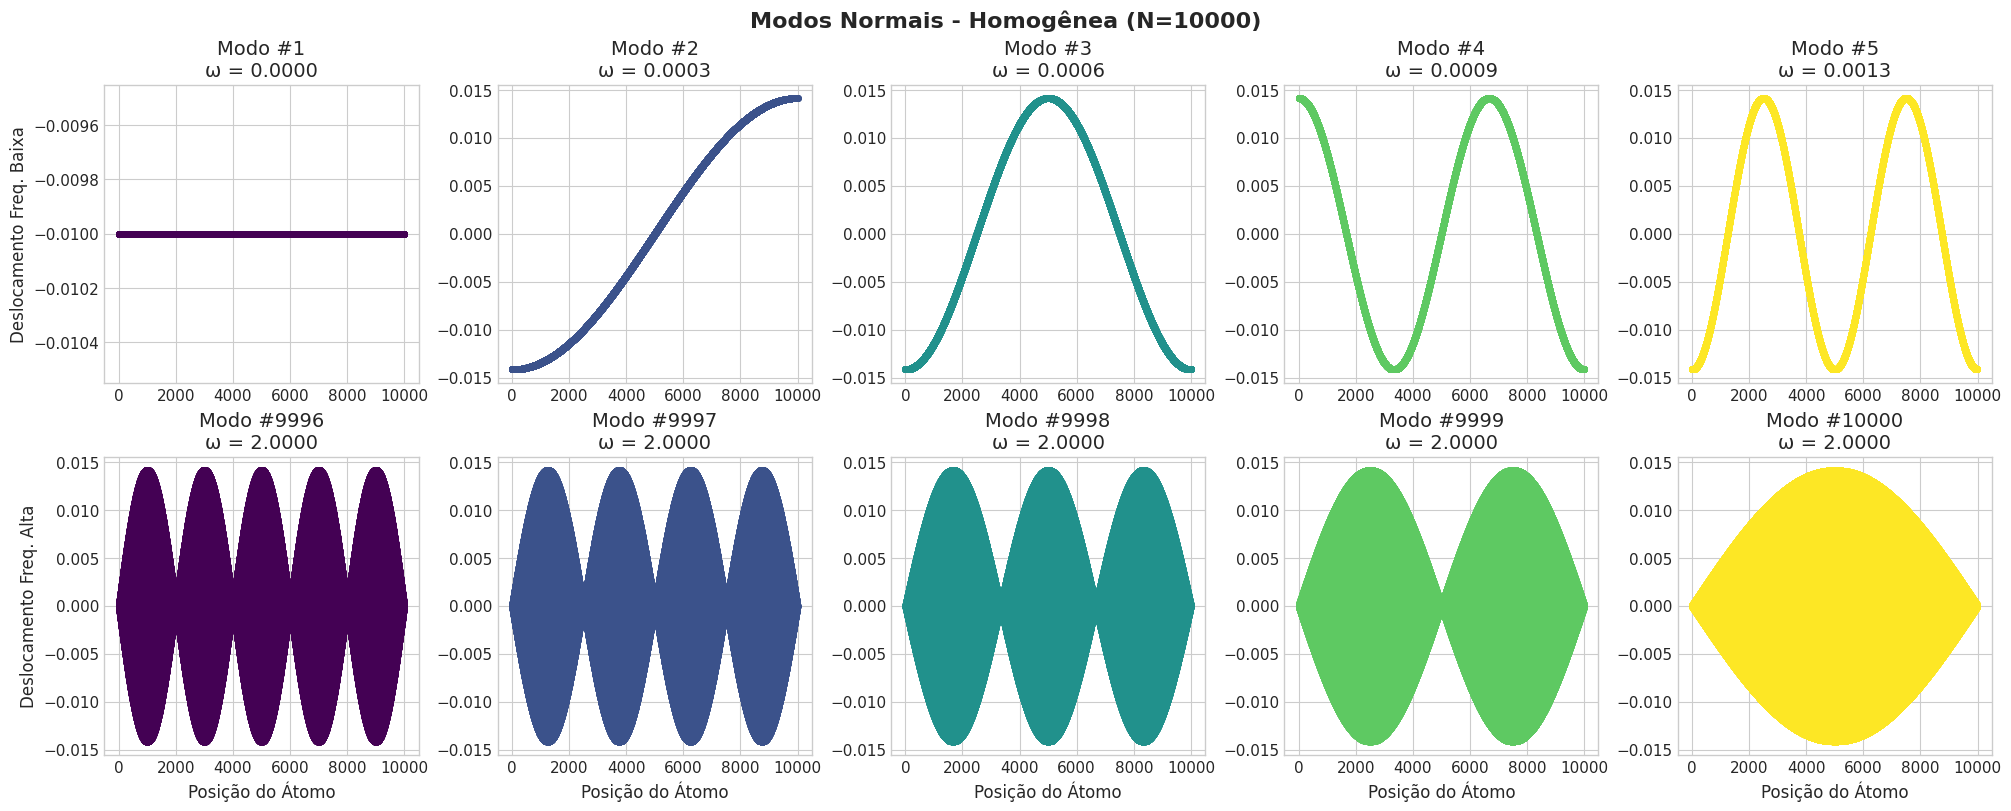

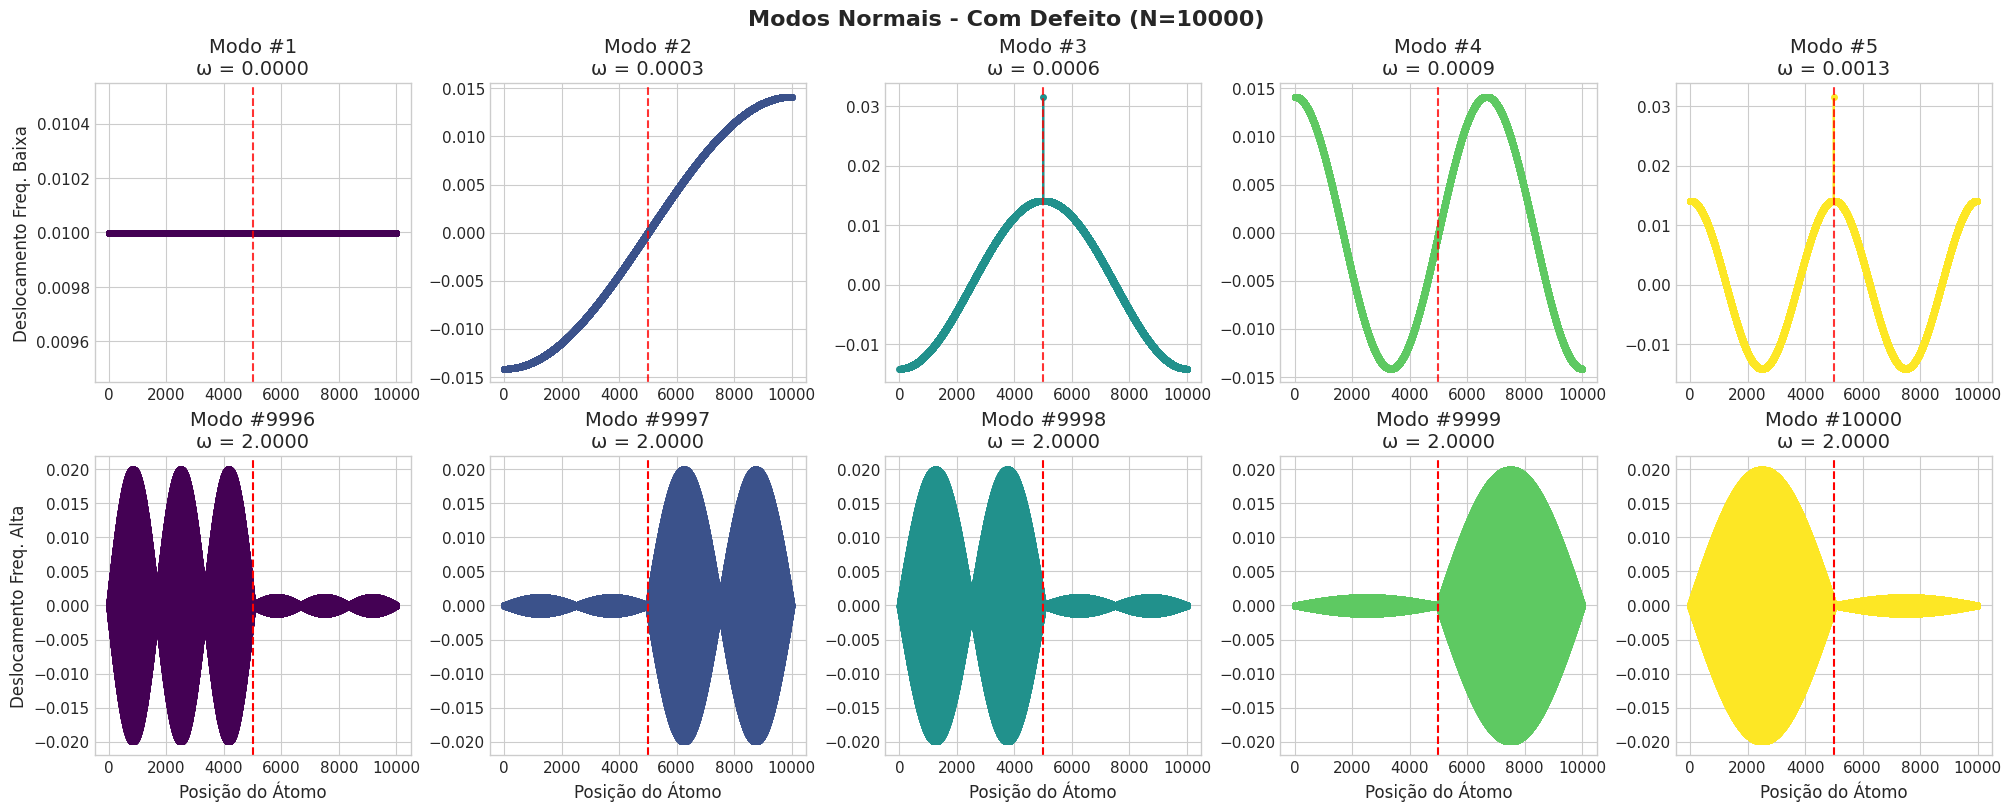


ANÁLISE DE DEFEITOS

Analisando defeito para N = 100
  Análise de sobreposição de modos (N=100): Sobreposição média = 0.7756


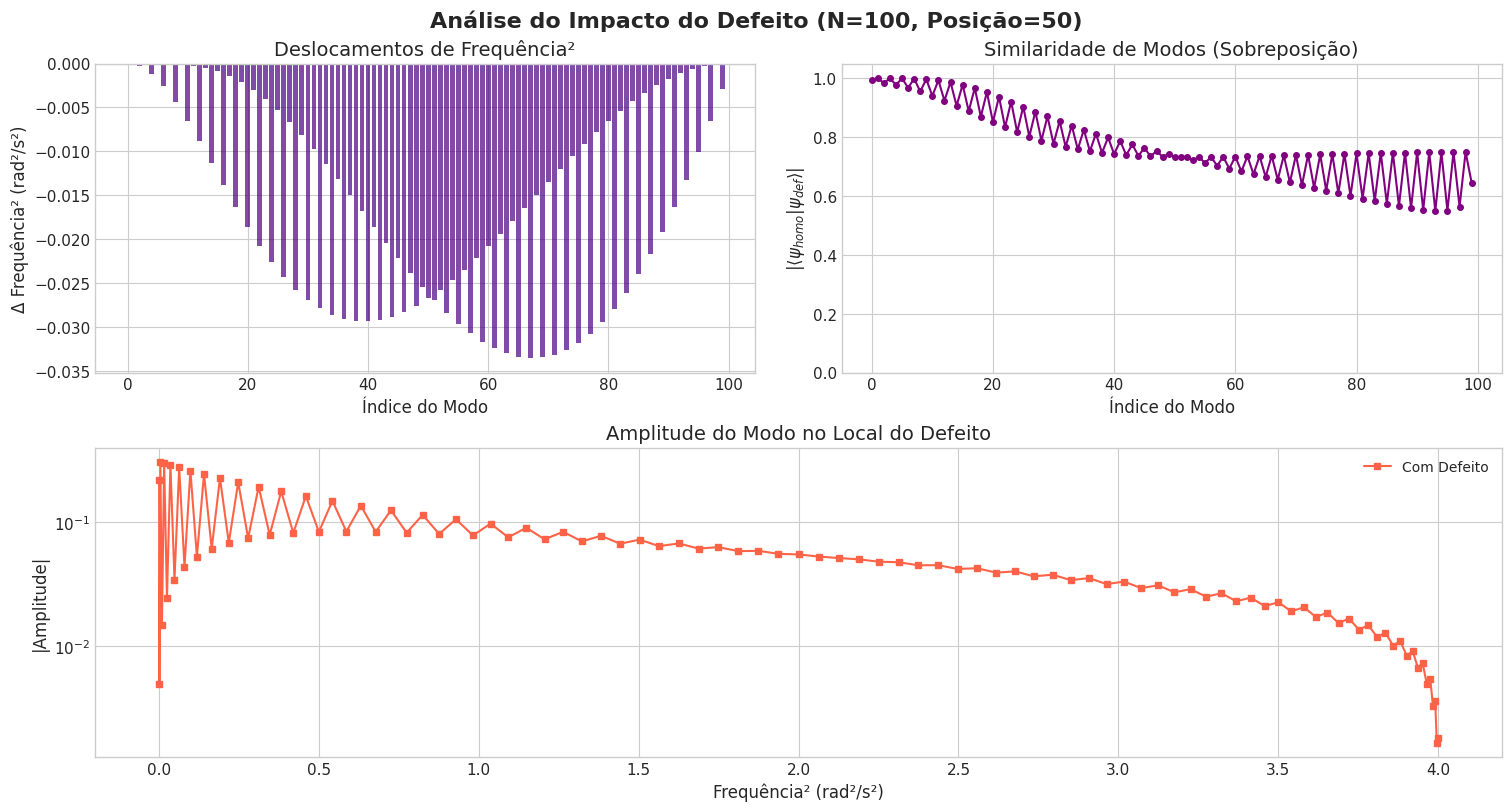


Analisando defeito para N = 1000
  Análise de sobreposição de modos (N=1000): Sobreposição média = 0.7695


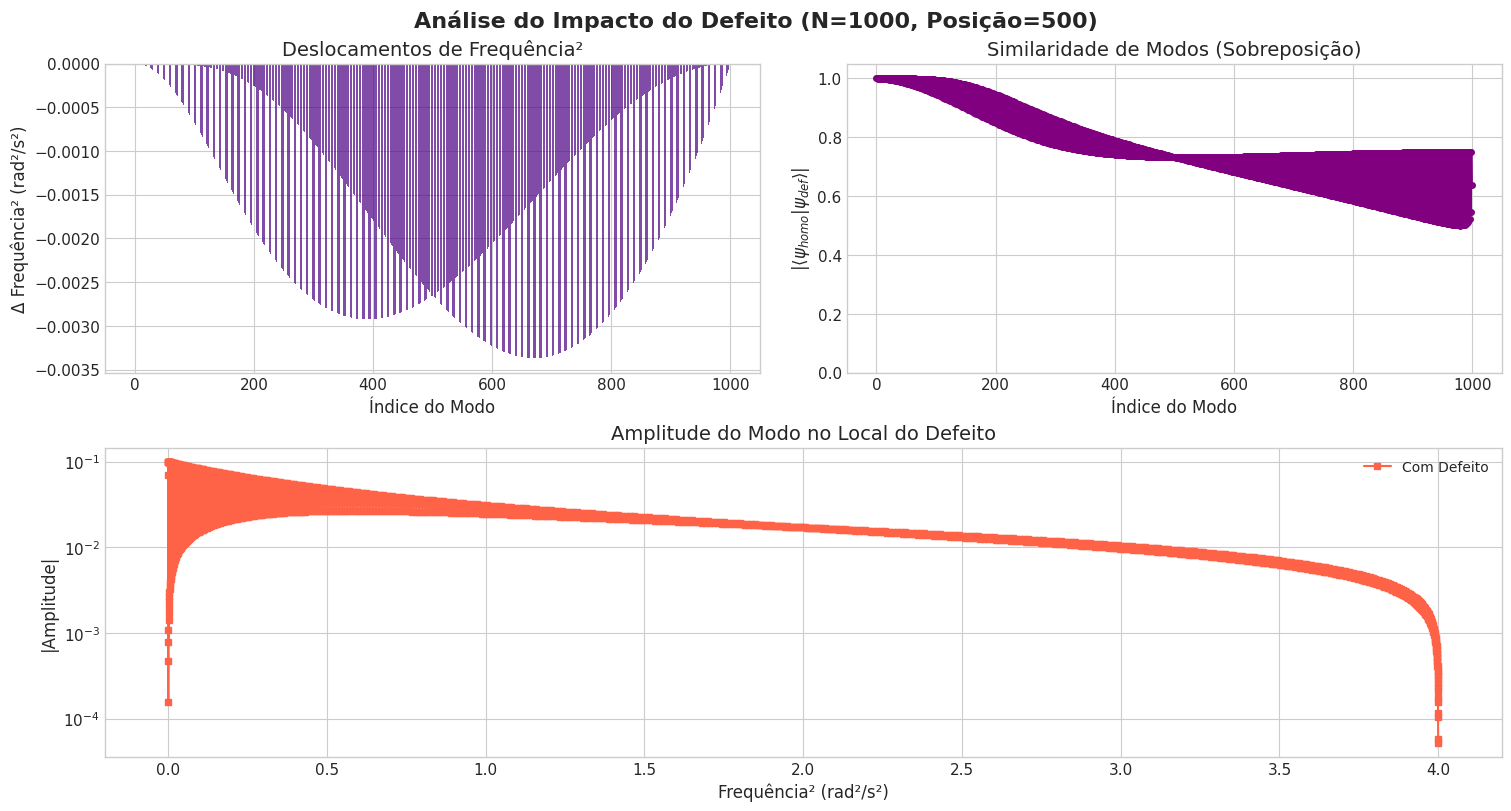


Analisando defeito para N = 10000
  Análise de sobreposição de modos (N=10000): Sobreposição média = 0.7686


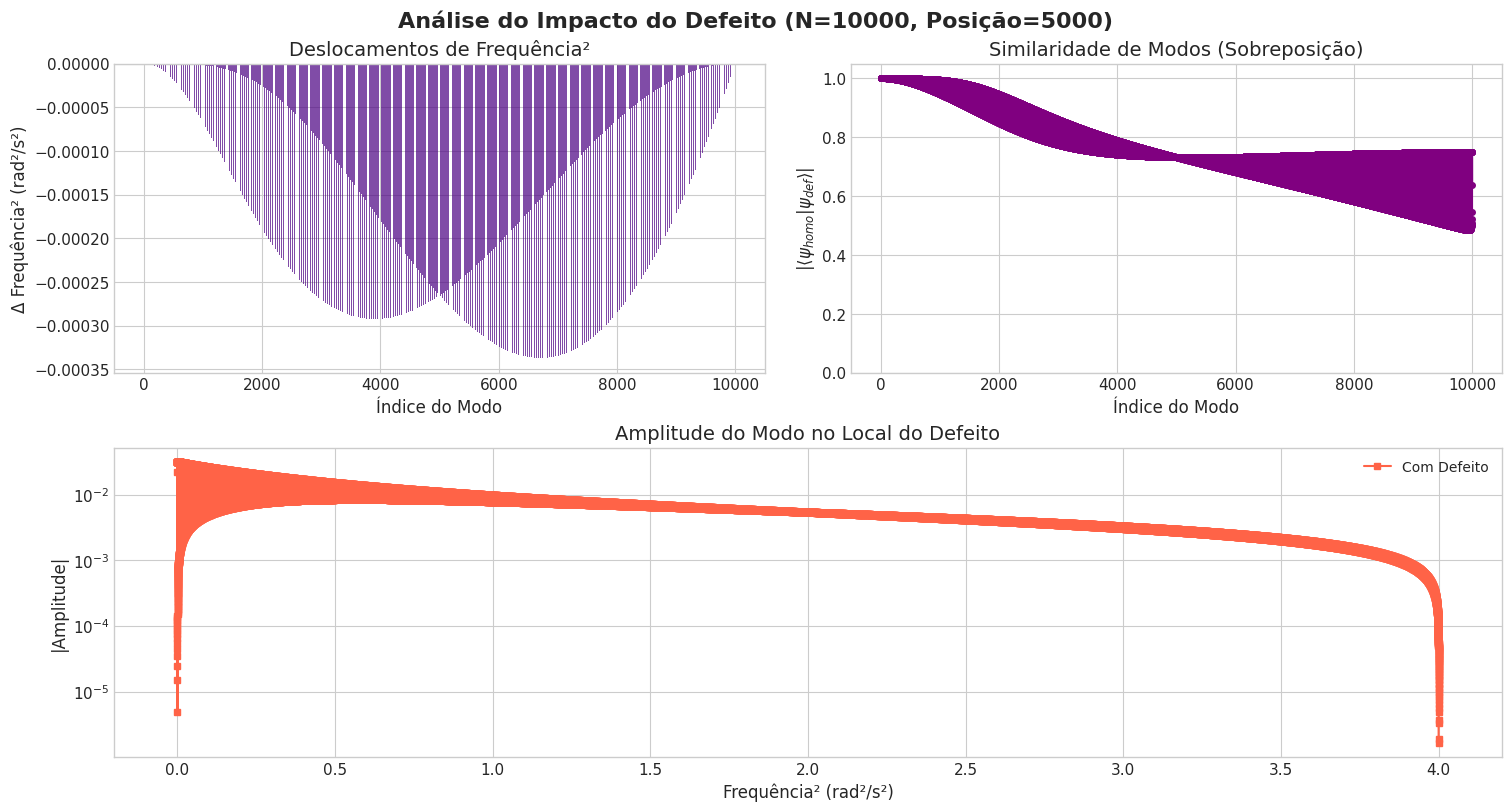

In [8]:
# =============================================================================
# Bloco Principal de Execução
# =============================================================================
if __name__ == '__main__':
    print("INICIALIZANDO SIMULAÇÃO DE CADEIA ATÔMICA")
    print("="*60)

    chain = AtomicChain1D(m=m, m2=m2, k=k)

    # Executa a simulação completa
    results = chain.run_simulation(chain_lengths)

    print(f"\nRESUMO DOS DADOS DA SIMULAÇÃO:")
    for N in chain_lengths:
        if N in results:
            n_homo = len(results[N]['homogeneous']['frequencies'])
            n_defect = len(results[N]['defective']['frequencies'])
            print(f"  N={N:5d}: {n_homo:5d} modos homo., {n_defect:5d} modos com defeito")

    # --- Executa as Análises ---
    print("\nEXECUTANDO ANÁLISES")
    print("="*50)
    density_of_states_analysis(results, chain_lengths)
    normal_mode_analysis(results, chain_lengths)
    defect_analysis(results, chain_lengths)

A tabela a seguir resume os principais resultados numéricos para as diferentes configurações. A frequência máxima teórica para a cadeia homogênea infinita é $\omega_{max} = \sqrt{4k/m} = 2.0$ rad/s.

| **N** | **Configuração** | **Método de Solução** | **$\omega_{min}$ (rad/s)** | **$\omega_{max}$ (rad/s)** |
| :---: | :---: | :---: | :---: | :---: |
| 100 | Homogênea | `dense` | 0.0000 | 1.9995 |
| 100 | Com Defeito | `dense` | 0.0000 | 1.9969 |
| 1000 | Homogênea | `tridiagonal` | 0.0000 | 2.0000 |
| 1000 | Com Defeito | `tridiagonal` | 0.0000 | 1.9997 |
| 10000 | Homogênea | `tridiagonal` | 0.0000 | 2.0000 |
| 10000 | Com Defeito | `tridiagonal` | 0.0000 | 2.0000 |

### **4. Discussão**

#### **4.1. Efeito do Comprimento da Cadeia: Convergência e Limite Termodinâmico**

Uma das conclusões mais importantes é a notável consistência das propriedades vibracionais entre os diferentes comprimentos de cadeia ($N=100, 1000, 10000$), indicando uma convergência para o limite termodinâmico, onde as características físicas refletem as de um material "bulk" infinito. A forma característica em "U" da Densidade de Estados (DOS), uma assinatura universal de redes unidimensionais, torna-se mais suave e definida à medida que $N$ aumenta. Este efeito, conhecido como adensamento espectral, significa que mais modos vibracionais preenchem a mesma banda de energia, tornando a aproximação de um espectro contínuo cada vez mais precisa. Isso demonstra que a física do sistema é dominada por interações locais, e uma cadeia com $N=100$ já captura a essência do comportamento vibracional do material.

Ao mesmo tempo, os resultados revelam a diluição do impacto relativo do defeito com o aumento de $N$. Embora a física local que cria o modo localizado seja a mesma, sua assinatura na DOS global (que é normalizada) diminui. O único estado localizado representa uma fração cada vez menor ($1/N$) do total de modos, e seu efeito sobre a densidade espectral torna-se menos pronunciado.

#### **4.2. Mecanismos Físicos da Perturbação pelo Defeito de Massa**

A introdução de um átomo de massa pesada ($m_2 = 5m$) quebra a simetria translacional da rede, transformando o átomo modificado em um centro de espalhamento para as ondas vibracionais. Fisicamente, isso pode ser entendido como uma mudança na impedância acústica local, que gera reflexão parcial das ondas.

O gráfico de diferença da DOS (Defeito - Homogênea) funciona como uma "impressão digital" do impacto do defeito, revelando um padrão de redistribuição espectral. É fundamental notar que a área total sob esta curva de diferença é aproximadamente zero, confirmando a conservação do número total de modos vibracionais: o defeito não cria nem destrói estados, mas os redistribui em frequência. A análise quantitativa mostra uma tendência clara de "amolecimento" da rede, onde a maioria dos modos tem suas frequências reduzidas pela inércia adicional da massa pesada.

A análise revela uma correlação forte (r ≈ 0.73) entre a amplitude de um modo no local do defeito e a magnitude do deslocamento de frequência que ele sofre. Isso quantifica um princípio fundamental: modos com maior componente espacial no defeito são mais sensíveis à sua presença. A interação é altamente seletiva e ligada à simetria dos modos:
* **Modos com um antinó (amplitude máxima) no centro** interagem fortemente com o defeito, resultando em grandes deslocamentos de frequência e baixa similaridade com os modos originais.
* **Modos com um nó (amplitude nula) no centro** são efetivamente "invisíveis" ao defeito, permanecendo praticamente inalterados (similaridade > 99.9%), demonstrando uma "imunidade natural" à perturbação.

#### **4.3. Localização Espacial e a Emergência de Modos Localizados**

A quebra de simetria leva à coexistência de dois tipos distintos de estados vibracionais: **modos estendidos**, delocalizados por toda a cadeia, e **modos localizados**, com energia concentrada espacialmente ao redor do defeito. O gráfico de "Amplitude do Modo no Local do Defeito" em função da frequência atua como um "detector de localização" sensível, onde o pico agudo e dominante em baixa frequência ($\omega^2 \approx 0.2 \text{ rad}^2/\text{s}^2$) prova a existência de um modo localizado.

O mecanismo físico subjacente a este fenômeno é a reflexão múltipla na interface de impedância criada pelo defeito. Para frequências específicas, geralmente fora da banda permitida da cadeia perfeita, essas reflexões geram interferência construtiva, criando um padrão de onda estacionária com amplitude máxima no defeito e decaimento exponencial nas regiões adjacentes. Este fenômeno é uma manifestação da localização de Anderson, onde a desordem (neste caso, um único defeito) pode aprisionar estados que seriam propagantes na rede perfeita. Em contrapartida, em altas frequências ($\omega^2 \to 4.0$), a amplitude no local do defeito cai drasticamente, quantificando a supressão do movimento do átomo pesado, que não consegue acompanhar as oscilações rápidas.

#### **4.4. Implicações Físicas e Tecnológicas**

A capacidade de um único defeito alterar as propriedades coletivas de um material tem profundas implicações no mundo real, transformando imperfeições em ferramentas funcionais.

1.  **Engenharia de Transporte e Condutividade Térmica:** Em materiais isolantes, onde o calor é transportado por fônons (quanta de vibração da rede), o defeito atua como um obstáculo. Ao espalhar fônons estendidos e aprisionar energia em modos localizados, ele reduz a **condutividade térmica**. Esta é uma estratégia chave no projeto de **materiais termoelétricos** eficientes e isolantes térmicos avançados.

2.  **Metamateriais e Dispositivos Nanomecânicos:** O controle da propagação de ondas via defeitos é a base dos **metamateriais acústicos**. Arranjos periódicos de defeitos podem criar "band gaps" fonônicos — faixas de frequência proibidas — para construir filtros de vibração, cavidades ressonantes para armazenamento de energia ou guias de onda programáveis.

3.  **Sensores Nanomecânicos (NEMS):** A frequência ressonante, bem definida e altamente sensível de um modo localizado, o torna um candidato ideal para sensores de altíssima precisão. A energia concentrada amplifica a resposta a perturbações externas, como a adsorção de uma única molécula no local do defeito, que causaria um desvio de frequência facilmente detectável. A sensibilidade pode ser 10 a 100 vezes superior à de um sensor baseado em um modo estendido.

4.  **Propriedades Ópticas e Espectroscopia:** Um modo localizado, com sua frequência discreta, pode interagir de forma ressonante com a radiação eletromagnética. Esta propriedade pode ser explorada para criar filtros ópticos ou para identificar e caracterizar impurezas em materiais através de técnicas de **espectroscopia vibracional**.

### **5. Conclusões**

A atividade investigou, por meio de simulações numéricas, a dinâmica vibracional de uma cadeia atômica unidimensional contendo um defeito de massa pesada centrada na átomo central.
Foi observado que as propriedades espectrais convergem para o limite termodinâmico já em cadeias com cerca de \(N = 100\) átomos, demonstrando que simulações relativamente pequenas capturam fidedignamente a física de sistemas extensos.
A presença do defeito não cria nem destrói modos vibracionais; ele apenas redistribui a densidade de estados, reduzindo preferencialmente as frequências em faixas de baixa energia e “amolecendo” a rede localmente. Tais modos permanecem fortemente confinados ao redor do defeito, cuja frequência situa-se tipicamente abaixo da banda contínua. A amplitude desses modos no local da impureza correlaciona-se diretamente com o deslocamento de frequência, evidenciando a sensibilidade intrínseca a perturbações locais.

A capacidade de manipular a propagação de fônons por meio de defeitos pontuais oferece ferramentas funcionais para projetar propriedades de materiais, como o design de metamateriais acústicos, sensores nanomecânicos de alta sensibilidade e materiais termoelétricos de baixa condutividade térmica, entre outras aplicações.

Embora o modelo unidimensional e harmônico apresente limitações, ele estabelece uma base conceitual robusta para futuras investigações em sistemas mais complexos, com múltiplos defeitos e em dimensões superiores.